In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import torch
from torch.utils.data import TensorDataset, DataLoader
torch.set_default_device('cpu')

import numpy as np
import matplotlib.pyplot as plt
from transformers_simple.cnn import CNN

In [2]:
T = 1000
t = np.linspace(0,4,T)
K = 4*np.pi 
in_size = 20
out_size = 1
kernel_size = 3
hidden_channels = 16
num_layers = 3

epochs = 10000
batch_size = 32
log_interval = 4
learning_rate = 1e-4
device = torch.device('cpu')

In [3]:
net = CNN(input_length=in_size, input_channels=1, output_size=out_size, 
          hidden_channels=hidden_channels, kernel_size=kernel_size, num_layers=num_layers,
         activation=torch.nn.LeakyReLU(0.05))

In [4]:
data = np.sin(K*t) + np.cos(4*K*t)

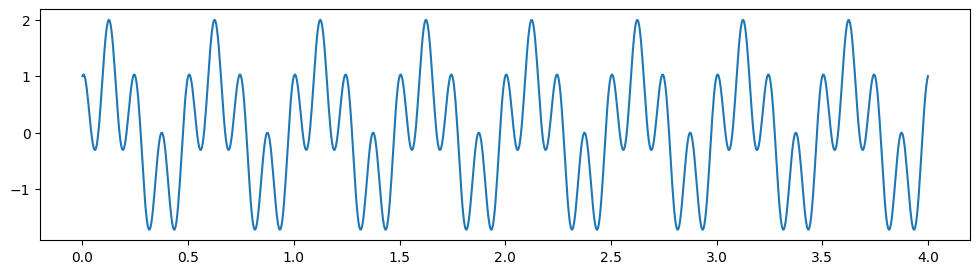

In [5]:
plt.figure(figsize=(12,3))
plt.plot(t,data)
plt.show()

In [6]:
X = np.zeros((T,1,in_size))
Y = np.zeros((T,out_size))

for t in range(in_size+1,T):
    X[t,0] = data[t-in_size:t]
    Y[t] = data[t]

In [7]:
Ns = int(0.5*T)

Xtrain = X[:Ns]
Ytrain = Y[:Ns]

Xtrain = Xtrain[in_size+1:]
Ytrain = Ytrain[in_size+1:]

Xtest = X[Ns:]
Ytest = Y[Ns:]

In [8]:
data_train = TensorDataset(torch.Tensor(Xtrain), torch.Tensor(Ytrain))
data_test = TensorDataset(torch.Tensor(Xtest), torch.Tensor(Ytest))

train_loader = DataLoader(data_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(data_test, batch_size=batch_size, shuffle=True)

In [9]:
opt = torch.optim.Adam(net.parameters(),lr=learning_rate)

In [10]:
loss_fn = torch.nn.MSELoss()

In [11]:
for e in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        opt.zero_grad()
        output = net(data)
        loss = loss_fn(output, target)
        loss.backward()
        opt.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                e, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

Train Epoch: 0 [0/479 (0%)]	Loss: 1.375546
Train Epoch: 0 [128/479 (27%)]	Loss: 1.063592
Train Epoch: 0 [256/479 (53%)]	Loss: 0.987856
Train Epoch: 0 [384/479 (80%)]	Loss: 0.696372
Train Epoch: 1 [0/479 (0%)]	Loss: 0.872854
Train Epoch: 1 [128/479 (27%)]	Loss: 0.955449
Train Epoch: 1 [256/479 (53%)]	Loss: 0.808432
Train Epoch: 1 [384/479 (80%)]	Loss: 0.887752
Train Epoch: 2 [0/479 (0%)]	Loss: 0.856390
Train Epoch: 2 [128/479 (27%)]	Loss: 0.882365
Train Epoch: 2 [256/479 (53%)]	Loss: 0.806529
Train Epoch: 2 [384/479 (80%)]	Loss: 0.929881
Train Epoch: 3 [0/479 (0%)]	Loss: 1.087396
Train Epoch: 3 [128/479 (27%)]	Loss: 0.973442
Train Epoch: 3 [256/479 (53%)]	Loss: 1.128276
Train Epoch: 3 [384/479 (80%)]	Loss: 0.990651
Train Epoch: 4 [0/479 (0%)]	Loss: 1.008817
Train Epoch: 4 [128/479 (27%)]	Loss: 1.103402
Train Epoch: 4 [256/479 (53%)]	Loss: 1.113895
Train Epoch: 4 [384/479 (80%)]	Loss: 0.638373
Train Epoch: 5 [0/479 (0%)]	Loss: 0.796739
Train Epoch: 5 [128/479 (27%)]	Loss: 1.145922
Train 

Train Epoch: 46 [384/479 (80%)]	Loss: 0.009145
Train Epoch: 47 [0/479 (0%)]	Loss: 0.013810
Train Epoch: 47 [128/479 (27%)]	Loss: 0.013108
Train Epoch: 47 [256/479 (53%)]	Loss: 0.009424
Train Epoch: 47 [384/479 (80%)]	Loss: 0.013784
Train Epoch: 48 [0/479 (0%)]	Loss: 0.015311
Train Epoch: 48 [128/479 (27%)]	Loss: 0.011848
Train Epoch: 48 [256/479 (53%)]	Loss: 0.012062
Train Epoch: 48 [384/479 (80%)]	Loss: 0.011572
Train Epoch: 49 [0/479 (0%)]	Loss: 0.011244
Train Epoch: 49 [128/479 (27%)]	Loss: 0.015628
Train Epoch: 49 [256/479 (53%)]	Loss: 0.013871
Train Epoch: 49 [384/479 (80%)]	Loss: 0.010520
Train Epoch: 50 [0/479 (0%)]	Loss: 0.013248
Train Epoch: 50 [128/479 (27%)]	Loss: 0.014791
Train Epoch: 50 [256/479 (53%)]	Loss: 0.013866
Train Epoch: 50 [384/479 (80%)]	Loss: 0.010891
Train Epoch: 51 [0/479 (0%)]	Loss: 0.016044
Train Epoch: 51 [128/479 (27%)]	Loss: 0.011292
Train Epoch: 51 [256/479 (53%)]	Loss: 0.016460
Train Epoch: 51 [384/479 (80%)]	Loss: 0.010918
Train Epoch: 52 [0/479 (0%)]

Train Epoch: 92 [384/479 (80%)]	Loss: 0.011900
Train Epoch: 93 [0/479 (0%)]	Loss: 0.009267
Train Epoch: 93 [128/479 (27%)]	Loss: 0.009669
Train Epoch: 93 [256/479 (53%)]	Loss: 0.006719
Train Epoch: 93 [384/479 (80%)]	Loss: 0.009211
Train Epoch: 94 [0/479 (0%)]	Loss: 0.008131
Train Epoch: 94 [128/479 (27%)]	Loss: 0.008552
Train Epoch: 94 [256/479 (53%)]	Loss: 0.008825
Train Epoch: 94 [384/479 (80%)]	Loss: 0.009187
Train Epoch: 95 [0/479 (0%)]	Loss: 0.010058
Train Epoch: 95 [128/479 (27%)]	Loss: 0.008460
Train Epoch: 95 [256/479 (53%)]	Loss: 0.009932
Train Epoch: 95 [384/479 (80%)]	Loss: 0.007087
Train Epoch: 96 [0/479 (0%)]	Loss: 0.008317
Train Epoch: 96 [128/479 (27%)]	Loss: 0.007862
Train Epoch: 96 [256/479 (53%)]	Loss: 0.007861
Train Epoch: 96 [384/479 (80%)]	Loss: 0.009835
Train Epoch: 97 [0/479 (0%)]	Loss: 0.007108
Train Epoch: 97 [128/479 (27%)]	Loss: 0.009851
Train Epoch: 97 [256/479 (53%)]	Loss: 0.009088
Train Epoch: 97 [384/479 (80%)]	Loss: 0.009354
Train Epoch: 98 [0/479 (0%)]

Train Epoch: 137 [384/479 (80%)]	Loss: 0.005195
Train Epoch: 138 [0/479 (0%)]	Loss: 0.003370
Train Epoch: 138 [128/479 (27%)]	Loss: 0.004102
Train Epoch: 138 [256/479 (53%)]	Loss: 0.006608
Train Epoch: 138 [384/479 (80%)]	Loss: 0.005465
Train Epoch: 139 [0/479 (0%)]	Loss: 0.004010
Train Epoch: 139 [128/479 (27%)]	Loss: 0.004265
Train Epoch: 139 [256/479 (53%)]	Loss: 0.006678
Train Epoch: 139 [384/479 (80%)]	Loss: 0.004894
Train Epoch: 140 [0/479 (0%)]	Loss: 0.006140
Train Epoch: 140 [128/479 (27%)]	Loss: 0.004107
Train Epoch: 140 [256/479 (53%)]	Loss: 0.005229
Train Epoch: 140 [384/479 (80%)]	Loss: 0.003574
Train Epoch: 141 [0/479 (0%)]	Loss: 0.003426
Train Epoch: 141 [128/479 (27%)]	Loss: 0.006009
Train Epoch: 141 [256/479 (53%)]	Loss: 0.003969
Train Epoch: 141 [384/479 (80%)]	Loss: 0.006174
Train Epoch: 142 [0/479 (0%)]	Loss: 0.005035
Train Epoch: 142 [128/479 (27%)]	Loss: 0.004001
Train Epoch: 142 [256/479 (53%)]	Loss: 0.004752
Train Epoch: 142 [384/479 (80%)]	Loss: 0.005188
Train E

Train Epoch: 181 [384/479 (80%)]	Loss: 0.002171
Train Epoch: 182 [0/479 (0%)]	Loss: 0.003402
Train Epoch: 182 [128/479 (27%)]	Loss: 0.002247
Train Epoch: 182 [256/479 (53%)]	Loss: 0.002507
Train Epoch: 182 [384/479 (80%)]	Loss: 0.002074
Train Epoch: 183 [0/479 (0%)]	Loss: 0.003362
Train Epoch: 183 [128/479 (27%)]	Loss: 0.002431
Train Epoch: 183 [256/479 (53%)]	Loss: 0.001924
Train Epoch: 183 [384/479 (80%)]	Loss: 0.002738
Train Epoch: 184 [0/479 (0%)]	Loss: 0.002497
Train Epoch: 184 [128/479 (27%)]	Loss: 0.002833
Train Epoch: 184 [256/479 (53%)]	Loss: 0.004497
Train Epoch: 184 [384/479 (80%)]	Loss: 0.002592
Train Epoch: 185 [0/479 (0%)]	Loss: 0.002056
Train Epoch: 185 [128/479 (27%)]	Loss: 0.002264
Train Epoch: 185 [256/479 (53%)]	Loss: 0.002499
Train Epoch: 185 [384/479 (80%)]	Loss: 0.002538
Train Epoch: 186 [0/479 (0%)]	Loss: 0.001748
Train Epoch: 186 [128/479 (27%)]	Loss: 0.002505
Train Epoch: 186 [256/479 (53%)]	Loss: 0.002052
Train Epoch: 186 [384/479 (80%)]	Loss: 0.002217
Train E

Train Epoch: 225 [256/479 (53%)]	Loss: 0.001474
Train Epoch: 225 [384/479 (80%)]	Loss: 0.001141
Train Epoch: 226 [0/479 (0%)]	Loss: 0.001359
Train Epoch: 226 [128/479 (27%)]	Loss: 0.001253
Train Epoch: 226 [256/479 (53%)]	Loss: 0.001243
Train Epoch: 226 [384/479 (80%)]	Loss: 0.001162
Train Epoch: 227 [0/479 (0%)]	Loss: 0.001407
Train Epoch: 227 [128/479 (27%)]	Loss: 0.001000
Train Epoch: 227 [256/479 (53%)]	Loss: 0.001042
Train Epoch: 227 [384/479 (80%)]	Loss: 0.001048
Train Epoch: 228 [0/479 (0%)]	Loss: 0.001274
Train Epoch: 228 [128/479 (27%)]	Loss: 0.001235
Train Epoch: 228 [256/479 (53%)]	Loss: 0.000961
Train Epoch: 228 [384/479 (80%)]	Loss: 0.001250
Train Epoch: 229 [0/479 (0%)]	Loss: 0.001876
Train Epoch: 229 [128/479 (27%)]	Loss: 0.001198
Train Epoch: 229 [256/479 (53%)]	Loss: 0.000952
Train Epoch: 229 [384/479 (80%)]	Loss: 0.000928
Train Epoch: 230 [0/479 (0%)]	Loss: 0.001301
Train Epoch: 230 [128/479 (27%)]	Loss: 0.001250
Train Epoch: 230 [256/479 (53%)]	Loss: 0.001753
Train E

Train Epoch: 273 [128/479 (27%)]	Loss: 0.000823
Train Epoch: 273 [256/479 (53%)]	Loss: 0.000763
Train Epoch: 273 [384/479 (80%)]	Loss: 0.000378
Train Epoch: 274 [0/479 (0%)]	Loss: 0.000628
Train Epoch: 274 [128/479 (27%)]	Loss: 0.000478
Train Epoch: 274 [256/479 (53%)]	Loss: 0.000495
Train Epoch: 274 [384/479 (80%)]	Loss: 0.000351
Train Epoch: 275 [0/479 (0%)]	Loss: 0.000540
Train Epoch: 275 [128/479 (27%)]	Loss: 0.000300
Train Epoch: 275 [256/479 (53%)]	Loss: 0.000664
Train Epoch: 275 [384/479 (80%)]	Loss: 0.000527
Train Epoch: 276 [0/479 (0%)]	Loss: 0.000239
Train Epoch: 276 [128/479 (27%)]	Loss: 0.000389
Train Epoch: 276 [256/479 (53%)]	Loss: 0.000376
Train Epoch: 276 [384/479 (80%)]	Loss: 0.000494
Train Epoch: 277 [0/479 (0%)]	Loss: 0.000442
Train Epoch: 277 [128/479 (27%)]	Loss: 0.000252
Train Epoch: 277 [256/479 (53%)]	Loss: 0.000490
Train Epoch: 277 [384/479 (80%)]	Loss: 0.000254
Train Epoch: 278 [0/479 (0%)]	Loss: 0.000530
Train Epoch: 278 [128/479 (27%)]	Loss: 0.000483
Train E

Train Epoch: 318 [0/479 (0%)]	Loss: 0.000375
Train Epoch: 318 [128/479 (27%)]	Loss: 0.000191
Train Epoch: 318 [256/479 (53%)]	Loss: 0.000294
Train Epoch: 318 [384/479 (80%)]	Loss: 0.000216
Train Epoch: 319 [0/479 (0%)]	Loss: 0.000238
Train Epoch: 319 [128/479 (27%)]	Loss: 0.000350
Train Epoch: 319 [256/479 (53%)]	Loss: 0.000371
Train Epoch: 319 [384/479 (80%)]	Loss: 0.000249
Train Epoch: 320 [0/479 (0%)]	Loss: 0.000318
Train Epoch: 320 [128/479 (27%)]	Loss: 0.000262
Train Epoch: 320 [256/479 (53%)]	Loss: 0.000493
Train Epoch: 320 [384/479 (80%)]	Loss: 0.000241
Train Epoch: 321 [0/479 (0%)]	Loss: 0.000275
Train Epoch: 321 [128/479 (27%)]	Loss: 0.000310
Train Epoch: 321 [256/479 (53%)]	Loss: 0.000293
Train Epoch: 321 [384/479 (80%)]	Loss: 0.000205
Train Epoch: 322 [0/479 (0%)]	Loss: 0.000260
Train Epoch: 322 [128/479 (27%)]	Loss: 0.000183
Train Epoch: 322 [256/479 (53%)]	Loss: 0.000376
Train Epoch: 322 [384/479 (80%)]	Loss: 0.000447
Train Epoch: 323 [0/479 (0%)]	Loss: 0.000175
Train Epoc

Train Epoch: 362 [256/479 (53%)]	Loss: 0.000081
Train Epoch: 362 [384/479 (80%)]	Loss: 0.000269
Train Epoch: 363 [0/479 (0%)]	Loss: 0.000085
Train Epoch: 363 [128/479 (27%)]	Loss: 0.000141
Train Epoch: 363 [256/479 (53%)]	Loss: 0.000146
Train Epoch: 363 [384/479 (80%)]	Loss: 0.000105
Train Epoch: 364 [0/479 (0%)]	Loss: 0.000106
Train Epoch: 364 [128/479 (27%)]	Loss: 0.000230
Train Epoch: 364 [256/479 (53%)]	Loss: 0.000153
Train Epoch: 364 [384/479 (80%)]	Loss: 0.000189
Train Epoch: 365 [0/479 (0%)]	Loss: 0.000159
Train Epoch: 365 [128/479 (27%)]	Loss: 0.000072
Train Epoch: 365 [256/479 (53%)]	Loss: 0.000094
Train Epoch: 365 [384/479 (80%)]	Loss: 0.000120
Train Epoch: 366 [0/479 (0%)]	Loss: 0.000142
Train Epoch: 366 [128/479 (27%)]	Loss: 0.000110
Train Epoch: 366 [256/479 (53%)]	Loss: 0.000120
Train Epoch: 366 [384/479 (80%)]	Loss: 0.000243
Train Epoch: 367 [0/479 (0%)]	Loss: 0.000140
Train Epoch: 367 [128/479 (27%)]	Loss: 0.000156
Train Epoch: 367 [256/479 (53%)]	Loss: 0.000197
Train E

Train Epoch: 406 [384/479 (80%)]	Loss: 0.000078
Train Epoch: 407 [0/479 (0%)]	Loss: 0.000057
Train Epoch: 407 [128/479 (27%)]	Loss: 0.000112
Train Epoch: 407 [256/479 (53%)]	Loss: 0.000082
Train Epoch: 407 [384/479 (80%)]	Loss: 0.000085
Train Epoch: 408 [0/479 (0%)]	Loss: 0.000058
Train Epoch: 408 [128/479 (27%)]	Loss: 0.000058
Train Epoch: 408 [256/479 (53%)]	Loss: 0.000069
Train Epoch: 408 [384/479 (80%)]	Loss: 0.000152
Train Epoch: 409 [0/479 (0%)]	Loss: 0.000056
Train Epoch: 409 [128/479 (27%)]	Loss: 0.000096
Train Epoch: 409 [256/479 (53%)]	Loss: 0.000165
Train Epoch: 409 [384/479 (80%)]	Loss: 0.000112
Train Epoch: 410 [0/479 (0%)]	Loss: 0.000065
Train Epoch: 410 [128/479 (27%)]	Loss: 0.000051
Train Epoch: 410 [256/479 (53%)]	Loss: 0.000144
Train Epoch: 410 [384/479 (80%)]	Loss: 0.000101
Train Epoch: 411 [0/479 (0%)]	Loss: 0.000043
Train Epoch: 411 [128/479 (27%)]	Loss: 0.000099
Train Epoch: 411 [256/479 (53%)]	Loss: 0.000126
Train Epoch: 411 [384/479 (80%)]	Loss: 0.000130
Train E

Train Epoch: 451 [128/479 (27%)]	Loss: 0.000076
Train Epoch: 451 [256/479 (53%)]	Loss: 0.000063
Train Epoch: 451 [384/479 (80%)]	Loss: 0.000064
Train Epoch: 452 [0/479 (0%)]	Loss: 0.000068
Train Epoch: 452 [128/479 (27%)]	Loss: 0.000113
Train Epoch: 452 [256/479 (53%)]	Loss: 0.000055
Train Epoch: 452 [384/479 (80%)]	Loss: 0.000077
Train Epoch: 453 [0/479 (0%)]	Loss: 0.000037
Train Epoch: 453 [128/479 (27%)]	Loss: 0.000059
Train Epoch: 453 [256/479 (53%)]	Loss: 0.000052
Train Epoch: 453 [384/479 (80%)]	Loss: 0.000104
Train Epoch: 454 [0/479 (0%)]	Loss: 0.000024
Train Epoch: 454 [128/479 (27%)]	Loss: 0.000083
Train Epoch: 454 [256/479 (53%)]	Loss: 0.000070
Train Epoch: 454 [384/479 (80%)]	Loss: 0.000069
Train Epoch: 455 [0/479 (0%)]	Loss: 0.000078
Train Epoch: 455 [128/479 (27%)]	Loss: 0.000047
Train Epoch: 455 [256/479 (53%)]	Loss: 0.000048
Train Epoch: 455 [384/479 (80%)]	Loss: 0.000034
Train Epoch: 456 [0/479 (0%)]	Loss: 0.000031
Train Epoch: 456 [128/479 (27%)]	Loss: 0.000033
Train E

Train Epoch: 495 [384/479 (80%)]	Loss: 0.000034
Train Epoch: 496 [0/479 (0%)]	Loss: 0.000048
Train Epoch: 496 [128/479 (27%)]	Loss: 0.000043
Train Epoch: 496 [256/479 (53%)]	Loss: 0.000049
Train Epoch: 496 [384/479 (80%)]	Loss: 0.000028
Train Epoch: 497 [0/479 (0%)]	Loss: 0.000064
Train Epoch: 497 [128/479 (27%)]	Loss: 0.000026
Train Epoch: 497 [256/479 (53%)]	Loss: 0.000026
Train Epoch: 497 [384/479 (80%)]	Loss: 0.000047
Train Epoch: 498 [0/479 (0%)]	Loss: 0.000041
Train Epoch: 498 [128/479 (27%)]	Loss: 0.000028
Train Epoch: 498 [256/479 (53%)]	Loss: 0.000034
Train Epoch: 498 [384/479 (80%)]	Loss: 0.000044
Train Epoch: 499 [0/479 (0%)]	Loss: 0.000038
Train Epoch: 499 [128/479 (27%)]	Loss: 0.000025
Train Epoch: 499 [256/479 (53%)]	Loss: 0.000022
Train Epoch: 499 [384/479 (80%)]	Loss: 0.000036
Train Epoch: 500 [0/479 (0%)]	Loss: 0.000071
Train Epoch: 500 [128/479 (27%)]	Loss: 0.000027
Train Epoch: 500 [256/479 (53%)]	Loss: 0.000017
Train Epoch: 500 [384/479 (80%)]	Loss: 0.000034
Train E

Train Epoch: 540 [256/479 (53%)]	Loss: 0.000023
Train Epoch: 540 [384/479 (80%)]	Loss: 0.000029
Train Epoch: 541 [0/479 (0%)]	Loss: 0.000037
Train Epoch: 541 [128/479 (27%)]	Loss: 0.000019
Train Epoch: 541 [256/479 (53%)]	Loss: 0.000027
Train Epoch: 541 [384/479 (80%)]	Loss: 0.000032
Train Epoch: 542 [0/479 (0%)]	Loss: 0.000039
Train Epoch: 542 [128/479 (27%)]	Loss: 0.000028
Train Epoch: 542 [256/479 (53%)]	Loss: 0.000020
Train Epoch: 542 [384/479 (80%)]	Loss: 0.000021
Train Epoch: 543 [0/479 (0%)]	Loss: 0.000035
Train Epoch: 543 [128/479 (27%)]	Loss: 0.000023
Train Epoch: 543 [256/479 (53%)]	Loss: 0.000028
Train Epoch: 543 [384/479 (80%)]	Loss: 0.000039
Train Epoch: 544 [0/479 (0%)]	Loss: 0.000030
Train Epoch: 544 [128/479 (27%)]	Loss: 0.000022
Train Epoch: 544 [256/479 (53%)]	Loss: 0.000025
Train Epoch: 544 [384/479 (80%)]	Loss: 0.000016
Train Epoch: 545 [0/479 (0%)]	Loss: 0.000071
Train Epoch: 545 [128/479 (27%)]	Loss: 0.000039
Train Epoch: 545 [256/479 (53%)]	Loss: 0.000022
Train E

Train Epoch: 585 [256/479 (53%)]	Loss: 0.000019
Train Epoch: 585 [384/479 (80%)]	Loss: 0.000018
Train Epoch: 586 [0/479 (0%)]	Loss: 0.000024
Train Epoch: 586 [128/479 (27%)]	Loss: 0.000020
Train Epoch: 586 [256/479 (53%)]	Loss: 0.000024
Train Epoch: 586 [384/479 (80%)]	Loss: 0.000030
Train Epoch: 587 [0/479 (0%)]	Loss: 0.000015
Train Epoch: 587 [128/479 (27%)]	Loss: 0.000026
Train Epoch: 587 [256/479 (53%)]	Loss: 0.000018
Train Epoch: 587 [384/479 (80%)]	Loss: 0.000014
Train Epoch: 588 [0/479 (0%)]	Loss: 0.000023
Train Epoch: 588 [128/479 (27%)]	Loss: 0.000021
Train Epoch: 588 [256/479 (53%)]	Loss: 0.000021
Train Epoch: 588 [384/479 (80%)]	Loss: 0.000015
Train Epoch: 589 [0/479 (0%)]	Loss: 0.000025
Train Epoch: 589 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 589 [256/479 (53%)]	Loss: 0.000016
Train Epoch: 589 [384/479 (80%)]	Loss: 0.000012
Train Epoch: 590 [0/479 (0%)]	Loss: 0.000019
Train Epoch: 590 [128/479 (27%)]	Loss: 0.000019
Train Epoch: 590 [256/479 (53%)]	Loss: 0.000047
Train E

Train Epoch: 630 [256/479 (53%)]	Loss: 0.000015
Train Epoch: 630 [384/479 (80%)]	Loss: 0.000015
Train Epoch: 631 [0/479 (0%)]	Loss: 0.000014
Train Epoch: 631 [128/479 (27%)]	Loss: 0.000012
Train Epoch: 631 [256/479 (53%)]	Loss: 0.000015
Train Epoch: 631 [384/479 (80%)]	Loss: 0.000012
Train Epoch: 632 [0/479 (0%)]	Loss: 0.000016
Train Epoch: 632 [128/479 (27%)]	Loss: 0.000022
Train Epoch: 632 [256/479 (53%)]	Loss: 0.000012
Train Epoch: 632 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 633 [0/479 (0%)]	Loss: 0.000018
Train Epoch: 633 [128/479 (27%)]	Loss: 0.000014
Train Epoch: 633 [256/479 (53%)]	Loss: 0.000017
Train Epoch: 633 [384/479 (80%)]	Loss: 0.000019
Train Epoch: 634 [0/479 (0%)]	Loss: 0.000016
Train Epoch: 634 [128/479 (27%)]	Loss: 0.000016
Train Epoch: 634 [256/479 (53%)]	Loss: 0.000018
Train Epoch: 634 [384/479 (80%)]	Loss: 0.000014
Train Epoch: 635 [0/479 (0%)]	Loss: 0.000015
Train Epoch: 635 [128/479 (27%)]	Loss: 0.000017
Train Epoch: 635 [256/479 (53%)]	Loss: 0.000016
Train E

Train Epoch: 675 [256/479 (53%)]	Loss: 0.000016
Train Epoch: 675 [384/479 (80%)]	Loss: 0.000026
Train Epoch: 676 [0/479 (0%)]	Loss: 0.000011
Train Epoch: 676 [128/479 (27%)]	Loss: 0.000012
Train Epoch: 676 [256/479 (53%)]	Loss: 0.000013
Train Epoch: 676 [384/479 (80%)]	Loss: 0.000013
Train Epoch: 677 [0/479 (0%)]	Loss: 0.000012
Train Epoch: 677 [128/479 (27%)]	Loss: 0.000016
Train Epoch: 677 [256/479 (53%)]	Loss: 0.000014
Train Epoch: 677 [384/479 (80%)]	Loss: 0.000010
Train Epoch: 678 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 678 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 678 [256/479 (53%)]	Loss: 0.000012
Train Epoch: 678 [384/479 (80%)]	Loss: 0.000016
Train Epoch: 679 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 679 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 679 [256/479 (53%)]	Loss: 0.000029
Train Epoch: 679 [384/479 (80%)]	Loss: 0.000017
Train Epoch: 680 [0/479 (0%)]	Loss: 0.000014
Train Epoch: 680 [128/479 (27%)]	Loss: 0.000012
Train Epoch: 680 [256/479 (53%)]	Loss: 0.000016
Train E

Train Epoch: 720 [256/479 (53%)]	Loss: 0.000014
Train Epoch: 720 [384/479 (80%)]	Loss: 0.000011
Train Epoch: 721 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 721 [128/479 (27%)]	Loss: 0.000023
Train Epoch: 721 [256/479 (53%)]	Loss: 0.000013
Train Epoch: 721 [384/479 (80%)]	Loss: 0.000019
Train Epoch: 722 [0/479 (0%)]	Loss: 0.000016
Train Epoch: 722 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 722 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 722 [384/479 (80%)]	Loss: 0.000015
Train Epoch: 723 [0/479 (0%)]	Loss: 0.000011
Train Epoch: 723 [128/479 (27%)]	Loss: 0.000012
Train Epoch: 723 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 723 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 724 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 724 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 724 [256/479 (53%)]	Loss: 0.000016
Train Epoch: 724 [384/479 (80%)]	Loss: 0.000017
Train Epoch: 725 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 725 [128/479 (27%)]	Loss: 0.000015
Train Epoch: 725 [256/479 (53%)]	Loss: 0.000010
Train E

Train Epoch: 764 [384/479 (80%)]	Loss: 0.000020
Train Epoch: 765 [0/479 (0%)]	Loss: 0.000011
Train Epoch: 765 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 765 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 765 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 766 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 766 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 766 [256/479 (53%)]	Loss: 0.000014
Train Epoch: 766 [384/479 (80%)]	Loss: 0.000021
Train Epoch: 767 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 767 [128/479 (27%)]	Loss: 0.000049
Train Epoch: 767 [256/479 (53%)]	Loss: 0.000013
Train Epoch: 767 [384/479 (80%)]	Loss: 0.000019
Train Epoch: 768 [0/479 (0%)]	Loss: 0.000024
Train Epoch: 768 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 768 [256/479 (53%)]	Loss: 0.000013
Train Epoch: 768 [384/479 (80%)]	Loss: 0.000013
Train Epoch: 769 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 769 [128/479 (27%)]	Loss: 0.000011
Train Epoch: 769 [256/479 (53%)]	Loss: 0.000009
Train Epoch: 769 [384/479 (80%)]	Loss: 0.000007
Train E

Train Epoch: 809 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 809 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 810 [0/479 (0%)]	Loss: 0.000012
Train Epoch: 810 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 810 [256/479 (53%)]	Loss: 0.000009
Train Epoch: 810 [384/479 (80%)]	Loss: 0.000015
Train Epoch: 811 [0/479 (0%)]	Loss: 0.000011
Train Epoch: 811 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 811 [256/479 (53%)]	Loss: 0.000013
Train Epoch: 811 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 812 [0/479 (0%)]	Loss: 0.000015
Train Epoch: 812 [128/479 (27%)]	Loss: 0.000013
Train Epoch: 812 [256/479 (53%)]	Loss: 0.000029
Train Epoch: 812 [384/479 (80%)]	Loss: 0.000018
Train Epoch: 813 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 813 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 813 [256/479 (53%)]	Loss: 0.000029
Train Epoch: 813 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 814 [0/479 (0%)]	Loss: 0.000022
Train Epoch: 814 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 814 [256/479 (53%)]	Loss: 0.000020
Train E

Train Epoch: 854 [256/479 (53%)]	Loss: 0.000016
Train Epoch: 854 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 855 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 855 [128/479 (27%)]	Loss: 0.000016
Train Epoch: 855 [256/479 (53%)]	Loss: 0.000020
Train Epoch: 855 [384/479 (80%)]	Loss: 0.000012
Train Epoch: 856 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 856 [128/479 (27%)]	Loss: 0.000010
Train Epoch: 856 [256/479 (53%)]	Loss: 0.000013
Train Epoch: 856 [384/479 (80%)]	Loss: 0.000009
Train Epoch: 857 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 857 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 857 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 857 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 858 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 858 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 858 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 858 [384/479 (80%)]	Loss: 0.000014
Train Epoch: 859 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 859 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 859 [256/479 (53%)]	Loss: 0.000005
Train E

Train Epoch: 899 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 899 [256/479 (53%)]	Loss: 0.000009
Train Epoch: 899 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 900 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 900 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 900 [256/479 (53%)]	Loss: 0.000011
Train Epoch: 900 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 901 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 901 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 901 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 901 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 902 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 902 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 902 [256/479 (53%)]	Loss: 0.000009
Train Epoch: 902 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 903 [0/479 (0%)]	Loss: 0.000011
Train Epoch: 903 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 903 [256/479 (53%)]	Loss: 0.000011
Train Epoch: 903 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 904 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 904 [128/479 (27%)]	Loss: 0.000007
Train E

Train Epoch: 944 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 944 [256/479 (53%)]	Loss: 0.000018
Train Epoch: 944 [384/479 (80%)]	Loss: 0.000021
Train Epoch: 945 [0/479 (0%)]	Loss: 0.000017
Train Epoch: 945 [128/479 (27%)]	Loss: 0.000025
Train Epoch: 945 [256/479 (53%)]	Loss: 0.000029
Train Epoch: 945 [384/479 (80%)]	Loss: 0.000013
Train Epoch: 946 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 946 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 946 [256/479 (53%)]	Loss: 0.000019
Train Epoch: 946 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 947 [0/479 (0%)]	Loss: 0.000031
Train Epoch: 947 [128/479 (27%)]	Loss: 0.000016
Train Epoch: 947 [256/479 (53%)]	Loss: 0.000018
Train Epoch: 947 [384/479 (80%)]	Loss: 0.000016
Train Epoch: 948 [0/479 (0%)]	Loss: 0.000014
Train Epoch: 948 [128/479 (27%)]	Loss: 0.000010
Train Epoch: 948 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 948 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 949 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 949 [128/479 (27%)]	Loss: 0.000003
Train E

Train Epoch: 988 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 989 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 989 [128/479 (27%)]	Loss: 0.000021
Train Epoch: 989 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 989 [384/479 (80%)]	Loss: 0.000018
Train Epoch: 990 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 990 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 990 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 990 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 991 [0/479 (0%)]	Loss: 0.000014
Train Epoch: 991 [128/479 (27%)]	Loss: 0.000012
Train Epoch: 991 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 991 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 992 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 992 [128/479 (27%)]	Loss: 0.000011
Train Epoch: 992 [256/479 (53%)]	Loss: 0.000015
Train Epoch: 992 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 993 [0/479 (0%)]	Loss: 0.000016
Train Epoch: 993 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 993 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 993 [384/479 (80%)]	Loss: 0.000008
Train E

Train Epoch: 1032 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 1033 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 1033 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1033 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 1033 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 1034 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 1034 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 1034 [256/479 (53%)]	Loss: 0.000015
Train Epoch: 1034 [384/479 (80%)]	Loss: 0.000011
Train Epoch: 1035 [0/479 (0%)]	Loss: 0.000013
Train Epoch: 1035 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 1035 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1035 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 1036 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 1036 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 1036 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 1036 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 1037 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 1037 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1037 [256/479 (53%)]	Loss: 0.000009
Train Epoch: 1037 [384/479 (80%)]	L

Train Epoch: 1077 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1078 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 1078 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1078 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1078 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 1079 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 1079 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 1079 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1079 [384/479 (80%)]	Loss: 0.000010
Train Epoch: 1080 [0/479 (0%)]	Loss: 0.000014
Train Epoch: 1080 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 1080 [256/479 (53%)]	Loss: 0.000012
Train Epoch: 1080 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 1081 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 1081 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 1081 [256/479 (53%)]	Loss: 0.000014
Train Epoch: 1081 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 1082 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 1082 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 1082 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 1082 [384/479 (80%)]	L

Train Epoch: 1122 [384/479 (80%)]	Loss: 0.000011
Train Epoch: 1123 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 1123 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1123 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1123 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 1124 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1124 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1124 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1124 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 1125 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 1125 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1125 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 1125 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 1126 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 1126 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1126 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 1126 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 1127 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1127 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1127 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1127 [384/479 (80%)]	L

Train Epoch: 1167 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1168 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1168 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1168 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1168 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 1169 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1169 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 1169 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 1169 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 1170 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 1170 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1170 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 1170 [384/479 (80%)]	Loss: 0.000016
Train Epoch: 1171 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 1171 [128/479 (27%)]	Loss: 0.000012
Train Epoch: 1171 [256/479 (53%)]	Loss: 0.000016
Train Epoch: 1171 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 1172 [0/479 (0%)]	Loss: 0.000014
Train Epoch: 1172 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 1172 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1172 [384/479 (80%)]	L

Train Epoch: 1212 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 1213 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 1213 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 1213 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1213 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1214 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1214 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1214 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 1214 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1215 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1215 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1215 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 1215 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 1216 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 1216 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 1216 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1216 [384/479 (80%)]	Loss: 0.000010
Train Epoch: 1217 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 1217 [128/479 (27%)]	Loss: 0.000010
Train Epoch: 1217 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 1217 [384/479 (80%)]	L

Train Epoch: 1256 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 1256 [384/479 (80%)]	Loss: 0.000010
Train Epoch: 1257 [0/479 (0%)]	Loss: 0.000026
Train Epoch: 1257 [128/479 (27%)]	Loss: 0.000010
Train Epoch: 1257 [256/479 (53%)]	Loss: 0.000013
Train Epoch: 1257 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 1258 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 1258 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1258 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1258 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 1259 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1259 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 1259 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1259 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 1260 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 1260 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1260 [256/479 (53%)]	Loss: 0.000009
Train Epoch: 1260 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 1261 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 1261 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1261 [256/479 (53%)]	L

Train Epoch: 1299 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1299 [384/479 (80%)]	Loss: 0.000009
Train Epoch: 1300 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 1300 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 1300 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 1300 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 1301 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1301 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1301 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1301 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1302 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1302 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1302 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 1302 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1303 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1303 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 1303 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 1303 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 1304 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1304 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1304 [256/479 (53%)]	L

Train Epoch: 1343 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1343 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 1343 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1344 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1344 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 1344 [256/479 (53%)]	Loss: 0.000009
Train Epoch: 1344 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 1345 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 1345 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 1345 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1345 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 1346 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1346 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 1346 [256/479 (53%)]	Loss: 0.000009
Train Epoch: 1346 [384/479 (80%)]	Loss: 0.000010
Train Epoch: 1347 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 1347 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1347 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1347 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 1348 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 1348 [128/479 (27%)]	L

Train Epoch: 1387 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 1387 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 1388 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 1388 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1388 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1388 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 1389 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 1389 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1389 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 1389 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 1390 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1390 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1390 [256/479 (53%)]	Loss: 0.000022
Train Epoch: 1390 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 1391 [0/479 (0%)]	Loss: 0.000011
Train Epoch: 1391 [128/479 (27%)]	Loss: 0.000012
Train Epoch: 1391 [256/479 (53%)]	Loss: 0.000018
Train Epoch: 1391 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1392 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 1392 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 1392 [256/479 (53%)]	L

Train Epoch: 1431 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1432 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 1432 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1432 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1432 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 1433 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 1433 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1433 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1433 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1434 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1434 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1434 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 1434 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 1435 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 1435 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1435 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1435 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 1436 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1436 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1436 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1436 [384/479 (80%)]	L

Train Epoch: 1476 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 1476 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 1477 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1477 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 1477 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 1477 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1478 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1478 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1478 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 1478 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 1479 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 1479 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1479 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1479 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 1480 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 1480 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1480 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 1480 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 1481 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 1481 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1481 [256/479 (53%)]	L

Train Epoch: 1521 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 1521 [384/479 (80%)]	Loss: 0.000014
Train Epoch: 1522 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 1522 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 1522 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 1522 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 1523 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 1523 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1523 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1523 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1524 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1524 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1524 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 1524 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1525 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1525 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1525 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 1525 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 1526 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 1526 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 1526 [256/479 (53%)]	L

Train Epoch: 1566 [256/479 (53%)]	Loss: 0.000012
Train Epoch: 1566 [384/479 (80%)]	Loss: 0.000009
Train Epoch: 1567 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 1567 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 1567 [256/479 (53%)]	Loss: 0.000011
Train Epoch: 1567 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 1568 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 1568 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1568 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 1568 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 1569 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1569 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1569 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 1569 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1570 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1570 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1570 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 1570 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 1571 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1571 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1571 [256/479 (53%)]	L

Train Epoch: 1611 [256/479 (53%)]	Loss: 0.000058
Train Epoch: 1611 [384/479 (80%)]	Loss: 0.000039
Train Epoch: 1612 [0/479 (0%)]	Loss: 0.000044
Train Epoch: 1612 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 1612 [256/479 (53%)]	Loss: 0.000013
Train Epoch: 1612 [384/479 (80%)]	Loss: 0.000025
Train Epoch: 1613 [0/479 (0%)]	Loss: 0.000023
Train Epoch: 1613 [128/479 (27%)]	Loss: 0.000026
Train Epoch: 1613 [256/479 (53%)]	Loss: 0.000039
Train Epoch: 1613 [384/479 (80%)]	Loss: 0.000025
Train Epoch: 1614 [0/479 (0%)]	Loss: 0.000049
Train Epoch: 1614 [128/479 (27%)]	Loss: 0.000014
Train Epoch: 1614 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 1614 [384/479 (80%)]	Loss: 0.000013
Train Epoch: 1615 [0/479 (0%)]	Loss: 0.000041
Train Epoch: 1615 [128/479 (27%)]	Loss: 0.000010
Train Epoch: 1615 [256/479 (53%)]	Loss: 0.000022
Train Epoch: 1615 [384/479 (80%)]	Loss: 0.000020
Train Epoch: 1616 [0/479 (0%)]	Loss: 0.000024
Train Epoch: 1616 [128/479 (27%)]	Loss: 0.000022
Train Epoch: 1616 [256/479 (53%)]	L

Train Epoch: 1655 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1656 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1656 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1656 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1656 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1657 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 1657 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1657 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1657 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 1658 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 1658 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 1658 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 1658 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1659 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1659 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 1659 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 1659 [384/479 (80%)]	Loss: 0.000009
Train Epoch: 1660 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 1660 [128/479 (27%)]	Loss: 0.000011
Train Epoch: 1660 [256/479 (53%)]	Loss: 0.000016
Train Epoch: 1660 [384/479 (80%)]	L

Train Epoch: 1701 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 1702 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1702 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1702 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1702 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1703 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 1703 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1703 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 1703 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 1704 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1704 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1704 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 1704 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 1705 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1705 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1705 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 1705 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 1706 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1706 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1706 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1706 [384/479 (80%)]	L

Train Epoch: 1746 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1746 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 1747 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1747 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1747 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 1747 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 1748 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1748 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1748 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 1748 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 1749 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1749 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1749 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1749 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 1750 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1750 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1750 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1750 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 1751 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1751 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1751 [256/479 (53%)]	L

Train Epoch: 1791 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1791 [256/479 (53%)]	Loss: 0.000012
Train Epoch: 1791 [384/479 (80%)]	Loss: 0.000016
Train Epoch: 1792 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1792 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1792 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 1792 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 1793 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1793 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1793 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 1793 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 1794 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1794 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 1794 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 1794 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 1795 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1795 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1795 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 1795 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 1796 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 1796 [128/479 (27%)]	L

Train Epoch: 1834 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 1835 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 1835 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1835 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 1835 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1836 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1836 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1836 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 1836 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 1837 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1837 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1837 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 1837 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 1838 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1838 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1838 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 1838 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 1839 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1839 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 1839 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 1839 [384/479 (80%)]	L

Train Epoch: 1878 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 1878 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 1878 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 1878 [384/479 (80%)]	Loss: 0.000010
Train Epoch: 1879 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 1879 [128/479 (27%)]	Loss: 0.000025
Train Epoch: 1879 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 1879 [384/479 (80%)]	Loss: 0.000021
Train Epoch: 1880 [0/479 (0%)]	Loss: 0.000052
Train Epoch: 1880 [128/479 (27%)]	Loss: 0.000045
Train Epoch: 1880 [256/479 (53%)]	Loss: 0.000013
Train Epoch: 1880 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 1881 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 1881 [128/479 (27%)]	Loss: 0.000011
Train Epoch: 1881 [256/479 (53%)]	Loss: 0.000012
Train Epoch: 1881 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 1882 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 1882 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 1882 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 1882 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 1883 [0/479 (0%)]	Loss

Train Epoch: 1920 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 1920 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 1921 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 1921 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 1921 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1921 [384/479 (80%)]	Loss: 0.000017
Train Epoch: 1922 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 1922 [128/479 (27%)]	Loss: 0.000031
Train Epoch: 1922 [256/479 (53%)]	Loss: 0.000024
Train Epoch: 1922 [384/479 (80%)]	Loss: 0.000021
Train Epoch: 1923 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 1923 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1923 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 1923 [384/479 (80%)]	Loss: 0.000016
Train Epoch: 1924 [0/479 (0%)]	Loss: 0.000015
Train Epoch: 1924 [128/479 (27%)]	Loss: 0.000016
Train Epoch: 1924 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1924 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 1925 [0/479 (0%)]	Loss: 0.000013
Train Epoch: 1925 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 1925 [256/479 (53%)]	L

Train Epoch: 1966 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 1967 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 1967 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 1967 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 1967 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1968 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 1968 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1968 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 1968 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 1969 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 1969 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1969 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 1969 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 1970 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1970 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 1970 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 1970 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 1971 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 1971 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 1971 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 1971 [384/479 (80%)]	L

Train Epoch: 2010 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2011 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2011 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2011 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2011 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2012 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2012 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2012 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2012 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2013 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2013 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2013 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2013 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2014 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 2014 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2014 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2014 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2015 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2015 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2015 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2015 [384/479 (80%)]	L

Train Epoch: 2054 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 2055 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 2055 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2055 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2055 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2056 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2056 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2056 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2056 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2057 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 2057 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 2057 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 2057 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 2058 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 2058 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 2058 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 2058 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 2059 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 2059 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 2059 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2059 [384/479 (80%)]	L

Train Epoch: 2099 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 2099 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2100 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2100 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2100 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2100 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2101 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2101 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 2101 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2101 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2102 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2102 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2102 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2102 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2103 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2103 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2103 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2103 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 2104 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 2104 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 2104 [256/479 (53%)]	L

Train Epoch: 2144 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2144 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2144 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2145 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2145 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2145 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 2145 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 2146 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2146 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2146 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2146 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2147 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2147 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 2147 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2147 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 2148 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2148 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2148 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 2148 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2149 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 2149 [128/479 (27%)]	L

Train Epoch: 2188 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2188 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2189 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 2189 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2189 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 2189 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 2190 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 2190 [128/479 (27%)]	Loss: 0.000015
Train Epoch: 2190 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2190 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2191 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2191 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2191 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 2191 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 2192 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2192 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2192 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2192 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2193 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2193 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2193 [256/479 (53%)]	L

Train Epoch: 2231 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 2231 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 2232 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2232 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2232 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2232 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2233 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 2233 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2233 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2233 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2234 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2234 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2234 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2234 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2235 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2235 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2235 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2235 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2236 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2236 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2236 [256/479 (53%)]	L

Train Epoch: 2275 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2275 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 2276 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2276 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 2276 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2276 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 2277 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 2277 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2277 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2277 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2278 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 2278 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2278 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2278 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2279 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2279 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2279 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2279 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2280 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2280 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2280 [256/479 (53%)]	L

Train Epoch: 2319 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 2320 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 2320 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2320 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2320 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2321 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 2321 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 2321 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2321 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 2322 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 2322 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 2322 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 2322 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2323 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 2323 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2323 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2323 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 2324 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2324 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2324 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2324 [384/479 (80%)]	L

Train Epoch: 2363 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2363 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2364 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2364 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2364 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2364 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 2365 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2365 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2365 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2365 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 2366 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2366 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2366 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2366 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2367 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2367 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2367 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 2367 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 2368 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2368 [128/479 (27%)]	Loss: 0.000011
Train Epoch: 2368 [256/479 (53%)]	L

Train Epoch: 2406 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2407 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2407 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2407 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2407 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2408 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2408 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2408 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2408 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 2409 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2409 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 2409 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2409 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 2410 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2410 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2410 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2410 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 2411 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2411 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2411 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 2411 [384/479 (80%)]	L

Train Epoch: 2450 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 2451 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 2451 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2451 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 2451 [384/479 (80%)]	Loss: 0.000018
Train Epoch: 2452 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 2452 [128/479 (27%)]	Loss: 0.000016
Train Epoch: 2452 [256/479 (53%)]	Loss: 0.000020
Train Epoch: 2452 [384/479 (80%)]	Loss: 0.000012
Train Epoch: 2453 [0/479 (0%)]	Loss: 0.000011
Train Epoch: 2453 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 2453 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 2453 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2454 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2454 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 2454 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2454 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 2455 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 2455 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2455 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2455 [384/479 (80%)]	L

Train Epoch: 2494 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2495 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2495 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 2495 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 2495 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2496 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 2496 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2496 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2496 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 2497 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 2497 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2497 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2497 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2498 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2498 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2498 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2498 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 2499 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2499 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2499 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2499 [384/479 (80%)]	L

Train Epoch: 2539 [128/479 (27%)]	Loss: 0.000031
Train Epoch: 2539 [256/479 (53%)]	Loss: 0.000022
Train Epoch: 2539 [384/479 (80%)]	Loss: 0.000023
Train Epoch: 2540 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 2540 [128/479 (27%)]	Loss: 0.000026
Train Epoch: 2540 [256/479 (53%)]	Loss: 0.000021
Train Epoch: 2540 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 2541 [0/479 (0%)]	Loss: 0.000013
Train Epoch: 2541 [128/479 (27%)]	Loss: 0.000030
Train Epoch: 2541 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 2541 [384/479 (80%)]	Loss: 0.000015
Train Epoch: 2542 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 2542 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 2542 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 2542 [384/479 (80%)]	Loss: 0.000018
Train Epoch: 2543 [0/479 (0%)]	Loss: 0.000019
Train Epoch: 2543 [128/479 (27%)]	Loss: 0.000010
Train Epoch: 2543 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2543 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 2544 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 2544 [128/479 (27%)]	L

Train Epoch: 2582 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2582 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2582 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2583 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2583 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2583 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2583 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2584 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2584 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2584 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2584 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2585 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2585 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 2585 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2585 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 2586 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 2586 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 2586 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 2586 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 2587 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2587 [128/479 (27%)]	L

Train Epoch: 2626 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2626 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2627 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 2627 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2627 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2627 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 2628 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2628 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2628 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2628 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2629 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 2629 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 2629 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 2629 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 2630 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2630 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2630 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2630 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2631 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 2631 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 2631 [256/479 (53%)]	L

Train Epoch: 2670 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 2670 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 2670 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 2671 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2671 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2671 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2671 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2672 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2672 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2672 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2672 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2673 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 2673 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2673 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2673 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2674 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2674 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2674 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2674 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2675 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2675 [128/479 (27%)]	L

Train Epoch: 2713 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2714 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2714 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2714 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2714 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2715 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 2715 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 2715 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 2715 [384/479 (80%)]	Loss: 0.000014
Train Epoch: 2716 [0/479 (0%)]	Loss: 0.000020
Train Epoch: 2716 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 2716 [256/479 (53%)]	Loss: 0.000018
Train Epoch: 2716 [384/479 (80%)]	Loss: 0.000017
Train Epoch: 2717 [0/479 (0%)]	Loss: 0.000013
Train Epoch: 2717 [128/479 (27%)]	Loss: 0.000032
Train Epoch: 2717 [256/479 (53%)]	Loss: 0.000022
Train Epoch: 2717 [384/479 (80%)]	Loss: 0.000016
Train Epoch: 2718 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2718 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2718 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2718 [384/479 (80%)]	L

Train Epoch: 2757 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2758 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2758 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2758 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2758 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2759 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2759 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2759 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2759 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2760 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2760 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2760 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2760 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2761 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2761 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2761 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2761 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2762 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2762 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2762 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2762 [384/479 (80%)]	L

Train Epoch: 2801 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 2802 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 2802 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 2802 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 2802 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2803 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2803 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2803 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2803 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2804 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2804 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2804 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2804 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 2805 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2805 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2805 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2805 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 2806 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2806 [128/479 (27%)]	Loss: 0.000013
Train Epoch: 2806 [256/479 (53%)]	Loss: 0.000021
Train Epoch: 2806 [384/479 (80%)]	L

Train Epoch: 2846 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2846 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2847 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2847 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2847 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2847 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2848 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2848 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2848 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2848 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2849 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2849 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2849 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2849 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2850 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2850 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2850 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2850 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2851 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2851 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2851 [256/479 (53%)]	L

Train Epoch: 2891 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 2891 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2891 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2892 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 2892 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2892 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2892 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2893 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2893 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2893 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2893 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2894 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2894 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2894 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2894 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 2895 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 2895 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2895 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 2895 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 2896 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 2896 [128/479 (27%)]	L

Train Epoch: 2935 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 2935 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2936 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2936 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2936 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2936 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2937 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2937 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2937 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2937 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2938 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2938 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2938 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 2938 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2939 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2939 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2939 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2939 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2940 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2940 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 2940 [256/479 (53%)]	L

Train Epoch: 2979 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 2980 [0/479 (0%)]	Loss: 0.000019
Train Epoch: 2980 [128/479 (27%)]	Loss: 0.000020
Train Epoch: 2980 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 2980 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2981 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2981 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2981 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 2981 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 2982 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 2982 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 2982 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 2982 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 2983 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 2983 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 2983 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 2983 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 2984 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 2984 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 2984 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 2984 [384/479 (80%)]	L

Train Epoch: 3024 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3024 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3025 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3025 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3025 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3025 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 3026 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 3026 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 3026 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 3026 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 3027 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 3027 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3027 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 3027 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 3028 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3028 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3028 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3028 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 3029 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3029 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3029 [256/479 (53%)]	L

Train Epoch: 3069 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3069 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 3069 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 3070 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3070 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 3070 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 3070 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 3071 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 3071 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3071 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3071 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3072 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3072 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3072 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3072 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3073 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3073 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3073 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3073 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3074 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3074 [128/479 (27%)]	L

Train Epoch: 3113 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 3114 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3114 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3114 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3114 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 3115 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 3115 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3115 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 3115 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3116 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3116 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3116 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 3116 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 3117 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 3117 [128/479 (27%)]	Loss: 0.000014
Train Epoch: 3117 [256/479 (53%)]	Loss: 0.000011
Train Epoch: 3117 [384/479 (80%)]	Loss: 0.000016
Train Epoch: 3118 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 3118 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3118 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3118 [384/479 (80%)]	L

Train Epoch: 3158 [384/479 (80%)]	Loss: 0.000028
Train Epoch: 3159 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 3159 [128/479 (27%)]	Loss: 0.000029
Train Epoch: 3159 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 3159 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 3160 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 3160 [128/479 (27%)]	Loss: 0.000015
Train Epoch: 3160 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 3160 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 3161 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 3161 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3161 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 3161 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 3162 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 3162 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3162 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3162 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3163 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 3163 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3163 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3163 [384/479 (80%)]	L

Train Epoch: 3203 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3203 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 3203 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3204 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3204 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3204 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3204 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3205 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3205 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3205 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 3205 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3206 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3206 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3206 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3206 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3207 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3207 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3207 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 3207 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3208 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3208 [128/479 (27%)]	L

Train Epoch: 3248 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3248 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3248 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3249 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3249 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3249 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3249 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3250 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3250 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3250 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 3250 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3251 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3251 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3251 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3251 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3252 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3252 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3252 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3252 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3253 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3253 [128/479 (27%)]	L

Train Epoch: 3293 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3293 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3293 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3293 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3294 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3294 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3294 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3294 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3295 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3295 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3295 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 3295 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3296 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3296 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3296 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3296 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3297 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3297 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3297 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3297 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3298 [0/479 (0%)]	Loss

Train Epoch: 3335 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3335 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3336 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 3336 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3336 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3336 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 3337 [0/479 (0%)]	Loss: 0.000011
Train Epoch: 3337 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 3337 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 3337 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3338 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3338 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3338 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3338 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3339 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 3339 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3339 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3339 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 3340 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 3340 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3340 [256/479 (53%)]	L

Train Epoch: 3379 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3379 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 3379 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3380 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 3380 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3380 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3380 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 3381 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3381 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3381 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 3381 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 3382 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3382 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3382 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 3382 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 3383 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 3383 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 3383 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3383 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 3384 [0/479 (0%)]	Loss: 0.000012
Train Epoch: 3384 [128/479 (27%)]	L

Train Epoch: 3424 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 3424 [256/479 (53%)]	Loss: 0.000017
Train Epoch: 3424 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 3425 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 3425 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 3425 [256/479 (53%)]	Loss: 0.000012
Train Epoch: 3425 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 3426 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3426 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3426 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3426 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3427 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3427 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3427 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3427 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3428 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3428 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3428 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3428 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3429 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3429 [128/479 (27%)]	L

Train Epoch: 3469 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3469 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3469 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3470 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 3470 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3470 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3470 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3471 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3471 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 3471 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3471 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3472 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3472 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3472 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3472 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3473 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3473 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3473 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3473 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3474 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3474 [128/479 (27%)]	L

Train Epoch: 3514 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3514 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 3514 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 3514 [384/479 (80%)]	Loss: 0.000012
Train Epoch: 3515 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3515 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3515 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 3515 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 3516 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 3516 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3516 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 3516 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 3517 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3517 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 3517 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 3517 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 3518 [0/479 (0%)]	Loss: 0.000014
Train Epoch: 3518 [128/479 (27%)]	Loss: 0.000012
Train Epoch: 3518 [256/479 (53%)]	Loss: 0.000009
Train Epoch: 3518 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 3519 [0/479 (0%)]	Loss

Train Epoch: 3559 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 3559 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3559 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3559 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3560 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 3560 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3560 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3560 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3561 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3561 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3561 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 3561 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3562 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3562 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3562 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3562 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3563 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3563 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3563 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3563 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3564 [0/479 (0%)]	Loss

Train Epoch: 3603 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 3603 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 3603 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 3603 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 3604 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3604 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3604 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 3604 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 3605 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 3605 [128/479 (27%)]	Loss: 0.000016
Train Epoch: 3605 [256/479 (53%)]	Loss: 0.000014
Train Epoch: 3605 [384/479 (80%)]	Loss: 0.000017
Train Epoch: 3606 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3606 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 3606 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 3606 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3607 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 3607 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 3607 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3607 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3608 [0/479 (0%)]	Loss

Train Epoch: 3647 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 3648 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 3648 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3648 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 3648 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 3649 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3649 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3649 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3649 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3650 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3650 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3650 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 3650 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3651 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3651 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3651 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3651 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3652 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3652 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3652 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3652 [384/479 (80%)]	L

Train Epoch: 3692 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3692 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3692 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 3693 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 3693 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3693 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3693 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3694 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3694 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3694 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3694 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3695 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3695 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3695 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3695 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3696 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3696 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3696 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3696 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3697 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3697 [128/479 (27%)]	L

Train Epoch: 3735 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3736 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3736 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3736 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3736 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3737 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3737 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3737 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3737 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3738 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3738 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3738 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3738 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3739 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3739 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3739 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3739 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3740 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3740 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3740 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3740 [384/479 (80%)]	L

Train Epoch: 3778 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 3779 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3779 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 3779 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3779 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3780 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3780 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3780 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3780 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3781 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3781 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 3781 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 3781 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 3782 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 3782 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 3782 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 3782 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 3783 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3783 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3783 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3783 [384/479 (80%)]	L

Train Epoch: 3821 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3822 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3822 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3822 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3822 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3823 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3823 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 3823 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 3823 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 3824 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3824 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 3824 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 3824 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 3825 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 3825 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3825 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3825 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 3826 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 3826 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3826 [256/479 (53%)]	Loss: 0.000015
Train Epoch: 3826 [384/479 (80%)]	L

Train Epoch: 3865 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3866 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3866 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3866 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3866 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 3867 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3867 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3867 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3867 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3868 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3868 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3868 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 3868 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 3869 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3869 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 3869 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3869 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 3870 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 3870 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 3870 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 3870 [384/479 (80%)]	L

Train Epoch: 3910 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3910 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3911 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3911 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3911 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3911 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3912 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3912 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3912 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 3912 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3913 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3913 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3913 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 3913 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3914 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3914 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 3914 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3914 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3915 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 3915 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3915 [256/479 (53%)]	L

Train Epoch: 3955 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3955 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3956 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3956 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3956 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3956 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3957 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3957 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3957 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3957 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 3958 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3958 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 3958 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3958 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 3959 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 3959 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3959 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 3959 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 3960 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 3960 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 3960 [256/479 (53%)]	L

Train Epoch: 4000 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4000 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4000 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4001 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4001 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4001 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4001 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4002 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4002 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4002 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 4002 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4003 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4003 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4003 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4003 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4004 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 4004 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 4004 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4004 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4005 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4005 [128/479 (27%)]	L

Train Epoch: 4045 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 4045 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4045 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4045 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4046 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4046 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4046 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4046 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4047 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 4047 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4047 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4047 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4048 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4048 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4048 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4048 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4049 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4049 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4049 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 4049 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 4050 [0/479 (0%)]	Loss

Train Epoch: 4088 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4089 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4089 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4089 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4089 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4090 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4090 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4090 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4090 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4091 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4091 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4091 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4091 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4092 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4092 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4092 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 4092 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4093 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4093 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4093 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4093 [384/479 (80%)]	L

Train Epoch: 4132 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4132 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4132 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4132 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4133 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4133 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4133 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4133 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4134 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4134 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 4134 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 4134 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4135 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 4135 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 4135 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4135 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4136 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4136 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4136 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4136 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 4137 [0/479 (0%)]	Loss

Train Epoch: 4176 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4176 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4176 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4177 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4177 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4177 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4177 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4178 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4178 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4178 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4178 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4179 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4179 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4179 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4179 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4180 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 4180 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 4180 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4180 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4181 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4181 [128/479 (27%)]	L

Train Epoch: 4219 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 4220 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 4220 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 4220 [256/479 (53%)]	Loss: 0.000015
Train Epoch: 4220 [384/479 (80%)]	Loss: 0.000014
Train Epoch: 4221 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 4221 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 4221 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 4221 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 4222 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 4222 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 4222 [256/479 (53%)]	Loss: 0.000011
Train Epoch: 4222 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 4223 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 4223 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 4223 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 4223 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 4224 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4224 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 4224 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4224 [384/479 (80%)]	L

Train Epoch: 4264 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4264 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4265 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4265 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 4265 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4265 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4266 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4266 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4266 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4266 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 4267 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 4267 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 4267 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 4267 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 4268 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 4268 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4268 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4268 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4269 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4269 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4269 [256/479 (53%)]	L

Train Epoch: 4309 [256/479 (53%)]	Loss: 0.000037
Train Epoch: 4309 [384/479 (80%)]	Loss: 0.000020
Train Epoch: 4310 [0/479 (0%)]	Loss: 0.000030
Train Epoch: 4310 [128/479 (27%)]	Loss: 0.000042
Train Epoch: 4310 [256/479 (53%)]	Loss: 0.000015
Train Epoch: 4310 [384/479 (80%)]	Loss: 0.000013
Train Epoch: 4311 [0/479 (0%)]	Loss: 0.000023
Train Epoch: 4311 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4311 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 4311 [384/479 (80%)]	Loss: 0.000009
Train Epoch: 4312 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4312 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 4312 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 4312 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4313 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4313 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4313 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4313 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4314 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 4314 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4314 [256/479 (53%)]	L

Train Epoch: 4354 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4354 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4355 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 4355 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4355 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4355 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4356 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4356 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4356 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4356 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4357 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 4357 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 4357 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 4357 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 4358 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 4358 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4358 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 4358 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4359 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4359 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4359 [256/479 (53%)]	L

Train Epoch: 4398 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 4399 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 4399 [128/479 (27%)]	Loss: 0.000019
Train Epoch: 4399 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 4399 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 4400 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4400 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 4400 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 4400 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4401 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 4401 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4401 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4401 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 4402 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 4402 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4402 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4402 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4403 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 4403 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 4403 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4403 [384/479 (80%)]	L

Train Epoch: 4443 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4444 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 4444 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 4444 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 4444 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 4445 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4445 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4445 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4445 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4446 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4446 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4446 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4446 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 4447 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 4447 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4447 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 4447 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4448 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4448 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4448 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4448 [384/479 (80%)]	L

Train Epoch: 4488 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4488 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4488 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4489 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4489 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4489 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4489 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4490 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4490 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4490 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 4490 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4491 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4491 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4491 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4491 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 4492 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4492 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 4492 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4492 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4493 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4493 [128/479 (27%)]	L

Train Epoch: 4533 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4533 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 4533 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4534 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4534 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4534 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4534 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4535 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4535 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4535 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4535 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4536 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4536 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4536 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4536 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4537 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4537 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4537 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4537 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4538 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4538 [128/479 (27%)]	L

Train Epoch: 4578 [0/479 (0%)]	Loss: 0.000014
Train Epoch: 4578 [128/479 (27%)]	Loss: 0.000026
Train Epoch: 4578 [256/479 (53%)]	Loss: 0.000018
Train Epoch: 4578 [384/479 (80%)]	Loss: 0.000027
Train Epoch: 4579 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 4579 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 4579 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 4579 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4580 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 4580 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 4580 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4580 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4581 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 4581 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 4581 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4581 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 4582 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4582 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4582 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4582 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4583 [0/479 (0%)]	Loss

Train Epoch: 4622 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 4622 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4623 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4623 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4623 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4623 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 4624 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4624 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4624 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 4624 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4625 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 4625 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4625 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4625 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4626 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4626 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4626 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4626 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4627 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4627 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4627 [256/479 (53%)]	L

Train Epoch: 4667 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 4667 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 4668 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4668 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4668 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4668 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 4669 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 4669 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4669 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 4669 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 4670 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4670 [128/479 (27%)]	Loss: 0.000010
Train Epoch: 4670 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 4670 [384/479 (80%)]	Loss: 0.000015
Train Epoch: 4671 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 4671 [128/479 (27%)]	Loss: 0.000018
Train Epoch: 4671 [256/479 (53%)]	Loss: 0.000031
Train Epoch: 4671 [384/479 (80%)]	Loss: 0.000023
Train Epoch: 4672 [0/479 (0%)]	Loss: 0.000025
Train Epoch: 4672 [128/479 (27%)]	Loss: 0.000037
Train Epoch: 4672 [256/479 (53%)]	L

Train Epoch: 4712 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 4712 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4713 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4713 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4713 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4713 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 4714 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4714 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4714 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4714 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4715 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4715 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4715 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4715 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4716 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4716 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4716 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4716 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4717 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4717 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4717 [256/479 (53%)]	L

Train Epoch: 4757 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4757 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4758 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4758 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4758 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4758 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4759 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4759 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 4759 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4759 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4760 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 4760 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4760 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4760 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 4761 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 4761 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4761 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4761 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4762 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4762 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4762 [256/479 (53%)]	L

Train Epoch: 4801 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 4802 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 4802 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 4802 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 4802 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 4803 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 4803 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4803 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4803 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4804 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4804 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4804 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4804 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4805 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 4805 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4805 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4805 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4806 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4806 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 4806 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4806 [384/479 (80%)]	L

Train Epoch: 4846 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 4846 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 4847 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 4847 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4847 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4847 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4848 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4848 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4848 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4848 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4849 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4849 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4849 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4849 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4850 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4850 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4850 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4850 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 4851 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4851 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4851 [256/479 (53%)]	L

Train Epoch: 4891 [256/479 (53%)]	Loss: 0.000015
Train Epoch: 4891 [384/479 (80%)]	Loss: 0.000010
Train Epoch: 4892 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4892 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 4892 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 4892 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 4893 [0/479 (0%)]	Loss: 0.000011
Train Epoch: 4893 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 4893 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 4893 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4894 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 4894 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4894 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4894 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4895 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4895 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 4895 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4895 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4896 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4896 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4896 [256/479 (53%)]	L

Train Epoch: 4935 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4935 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4935 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4935 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 4936 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4936 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4936 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 4936 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4937 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4937 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4937 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 4937 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4938 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 4938 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 4938 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4938 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4939 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 4939 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 4939 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4939 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4940 [0/479 (0%)]	Loss

Train Epoch: 4977 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4978 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4978 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 4978 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4978 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 4979 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 4979 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4979 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4979 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 4980 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 4980 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 4980 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 4980 [384/479 (80%)]	Loss: 0.000016
Train Epoch: 4981 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 4981 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 4981 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 4981 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 4982 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 4982 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 4982 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 4982 [384/479 (80%)]	L

Train Epoch: 5022 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5022 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 5022 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5023 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5023 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 5023 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 5023 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 5024 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5024 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 5024 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 5024 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 5025 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5025 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 5025 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 5025 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5026 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 5026 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 5026 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 5026 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5027 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 5027 [128/479 (27%)]	L

Train Epoch: 5067 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5067 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5067 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5068 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5068 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5068 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5068 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5069 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 5069 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 5069 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 5069 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5070 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 5070 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 5070 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 5070 [384/479 (80%)]	Loss: 0.000011
Train Epoch: 5071 [0/479 (0%)]	Loss: 0.000019
Train Epoch: 5071 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 5071 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 5071 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 5072 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 5072 [128/479 (27%)]	L

Train Epoch: 5112 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5112 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 5112 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 5113 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 5113 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5113 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5113 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 5114 [0/479 (0%)]	Loss: 0.000035
Train Epoch: 5114 [128/479 (27%)]	Loss: 0.000049
Train Epoch: 5114 [256/479 (53%)]	Loss: 0.000009
Train Epoch: 5114 [384/479 (80%)]	Loss: 0.000015
Train Epoch: 5115 [0/479 (0%)]	Loss: 0.000024
Train Epoch: 5115 [128/479 (27%)]	Loss: 0.000042
Train Epoch: 5115 [256/479 (53%)]	Loss: 0.000021
Train Epoch: 5115 [384/479 (80%)]	Loss: 0.000019
Train Epoch: 5116 [0/479 (0%)]	Loss: 0.000054
Train Epoch: 5116 [128/479 (27%)]	Loss: 0.000023
Train Epoch: 5116 [256/479 (53%)]	Loss: 0.000015
Train Epoch: 5116 [384/479 (80%)]	Loss: 0.000018
Train Epoch: 5117 [0/479 (0%)]	Loss: 0.000012
Train Epoch: 5117 [128/479 (27%)]	L

Train Epoch: 5157 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5157 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5157 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5157 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 5158 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 5158 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5158 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5158 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5159 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5159 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5159 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5159 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5160 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5160 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5160 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5160 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5161 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5161 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 5161 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5161 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5162 [0/479 (0%)]	Loss

Train Epoch: 5201 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5201 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 5201 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 5201 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5202 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 5202 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5202 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5202 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 5203 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5203 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5203 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 5203 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5204 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5204 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 5204 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 5204 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5205 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5205 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 5205 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 5205 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5206 [0/479 (0%)]	Loss

Train Epoch: 5244 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 5244 [128/479 (27%)]	Loss: 0.000010
Train Epoch: 5244 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 5244 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5245 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 5245 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 5245 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 5245 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 5246 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5246 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5246 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5246 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5247 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5247 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5247 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 5247 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5248 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5248 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5248 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 5248 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5249 [0/479 (0%)]	Loss

Train Epoch: 5287 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5287 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5288 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5288 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 5288 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 5288 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5289 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5289 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5289 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5289 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5290 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5290 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5290 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5290 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5291 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5291 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5291 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5291 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5292 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5292 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5292 [256/479 (53%)]	L

Train Epoch: 5330 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5330 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5330 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5331 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5331 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5331 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5331 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5332 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5332 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 5332 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 5332 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5333 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 5333 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 5333 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5333 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5334 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5334 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5334 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5334 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5335 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 5335 [128/479 (27%)]	L

Train Epoch: 5373 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5373 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5373 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 5373 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5374 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5374 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5374 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5374 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5375 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 5375 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 5375 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5375 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 5376 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 5376 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5376 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 5376 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 5377 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5377 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 5377 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5377 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 5378 [0/479 (0%)]	Loss

Train Epoch: 5415 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5416 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 5416 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 5416 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 5416 [384/479 (80%)]	Loss: 0.000012
Train Epoch: 5417 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 5417 [128/479 (27%)]	Loss: 0.000013
Train Epoch: 5417 [256/479 (53%)]	Loss: 0.000013
Train Epoch: 5417 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 5418 [0/479 (0%)]	Loss: 0.000030
Train Epoch: 5418 [128/479 (27%)]	Loss: 0.000013
Train Epoch: 5418 [256/479 (53%)]	Loss: 0.000022
Train Epoch: 5418 [384/479 (80%)]	Loss: 0.000013
Train Epoch: 5419 [0/479 (0%)]	Loss: 0.000017
Train Epoch: 5419 [128/479 (27%)]	Loss: 0.000018
Train Epoch: 5419 [256/479 (53%)]	Loss: 0.000037
Train Epoch: 5419 [384/479 (80%)]	Loss: 0.000019
Train Epoch: 5420 [0/479 (0%)]	Loss: 0.000022
Train Epoch: 5420 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 5420 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 5420 [384/479 (80%)]	L

Train Epoch: 5458 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5458 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5459 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5459 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5459 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5459 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5460 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5460 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5460 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5460 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5461 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5461 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5461 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5461 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 5462 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 5462 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 5462 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 5462 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 5463 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 5463 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5463 [256/479 (53%)]	L

Train Epoch: 5501 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5501 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5502 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 5502 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5502 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5502 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5503 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5503 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 5503 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 5503 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5504 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 5504 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 5504 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5504 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5505 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5505 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5505 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 5505 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5506 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5506 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 5506 [256/479 (53%)]	L

Train Epoch: 5546 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5546 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5547 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5547 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5547 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5547 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5548 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5548 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 5548 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5548 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5549 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 5549 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5549 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5549 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 5550 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5550 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5550 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 5550 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 5551 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 5551 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5551 [256/479 (53%)]	L

Train Epoch: 5590 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 5590 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5591 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5591 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5591 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5591 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5592 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5592 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5592 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 5592 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5593 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5593 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 5593 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5593 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5594 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5594 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5594 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 5594 [384/479 (80%)]	Loss: 0.000009
Train Epoch: 5595 [0/479 (0%)]	Loss: 0.000020
Train Epoch: 5595 [128/479 (27%)]	Loss: 0.000025
Train Epoch: 5595 [256/479 (53%)]	L

Train Epoch: 5634 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5635 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5635 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5635 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5635 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5636 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5636 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5636 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5636 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5637 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5637 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5637 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 5637 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5638 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5638 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5638 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5638 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5639 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 5639 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 5639 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5639 [384/479 (80%)]	L

Train Epoch: 5679 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 5679 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 5679 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 5679 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 5680 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5680 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 5680 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 5680 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 5681 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5681 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 5681 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 5681 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 5682 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 5682 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 5682 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5682 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5683 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5683 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5683 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5683 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5684 [0/479 (0%)]	Loss

Train Epoch: 5723 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5723 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5724 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5724 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5724 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5724 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5725 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 5725 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5725 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 5725 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5726 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5726 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5726 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5726 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 5727 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5727 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5727 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5727 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5728 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5728 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 5728 [256/479 (53%)]	L

Train Epoch: 5767 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 5767 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 5768 [0/479 (0%)]	Loss: 0.000011
Train Epoch: 5768 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 5768 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 5768 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 5769 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 5769 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 5769 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 5769 [384/479 (80%)]	Loss: 0.000010
Train Epoch: 5770 [0/479 (0%)]	Loss: 0.000047
Train Epoch: 5770 [128/479 (27%)]	Loss: 0.000032
Train Epoch: 5770 [256/479 (53%)]	Loss: 0.000014
Train Epoch: 5770 [384/479 (80%)]	Loss: 0.000017
Train Epoch: 5771 [0/479 (0%)]	Loss: 0.000020
Train Epoch: 5771 [128/479 (27%)]	Loss: 0.000015
Train Epoch: 5771 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 5771 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 5772 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 5772 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 5772 [256/479 (53%)]	L

Train Epoch: 5812 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5812 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5812 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5813 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5813 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5813 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5813 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5814 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5814 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5814 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5814 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5815 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 5815 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5815 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5815 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5816 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5816 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5816 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5816 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5817 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5817 [128/479 (27%)]	L

Train Epoch: 5857 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5857 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 5857 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5858 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5858 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5858 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 5858 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5859 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 5859 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 5859 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 5859 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 5860 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 5860 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 5860 [256/479 (53%)]	Loss: 0.000012
Train Epoch: 5860 [384/479 (80%)]	Loss: 0.000027
Train Epoch: 5861 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 5861 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 5861 [256/479 (53%)]	Loss: 0.000033
Train Epoch: 5861 [384/479 (80%)]	Loss: 0.000013
Train Epoch: 5862 [0/479 (0%)]	Loss: 0.000030
Train Epoch: 5862 [128/479 (27%)]	L

Train Epoch: 5901 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5902 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5902 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5902 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 5902 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 5903 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5903 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5903 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5903 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5904 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5904 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 5904 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5904 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5905 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5905 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5905 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5905 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5906 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5906 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 5906 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5906 [384/479 (80%)]	L

Train Epoch: 5945 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 5946 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 5946 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 5946 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 5946 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5947 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 5947 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 5947 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 5947 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 5948 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5948 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5948 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5948 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5949 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5949 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5949 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5949 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5950 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5950 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5950 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5950 [384/479 (80%)]	L

Train Epoch: 5990 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 5990 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 5991 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 5991 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5991 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5991 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5992 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5992 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5992 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 5992 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5993 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5993 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5993 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5993 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5994 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5994 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5994 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 5994 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 5995 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 5995 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 5995 [256/479 (53%)]	L

Train Epoch: 6035 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 6035 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6036 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6036 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6036 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6036 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6037 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6037 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6037 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6037 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6038 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6038 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6038 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 6038 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6039 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6039 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6039 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6039 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6040 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 6040 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 6040 [256/479 (53%)]	L

Train Epoch: 6079 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6080 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6080 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 6080 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6080 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6081 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6081 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6081 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6081 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6082 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6082 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6082 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6082 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6083 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 6083 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 6083 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6083 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6084 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6084 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6084 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6084 [384/479 (80%)]	L

Train Epoch: 6123 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6123 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6123 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6124 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6124 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6124 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6124 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6125 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6125 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6125 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6125 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6126 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6126 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 6126 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6126 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6127 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6127 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6127 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6127 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6128 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6128 [128/479 (27%)]	L

Train Epoch: 6167 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6168 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6168 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6168 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6168 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6169 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6169 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6169 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 6169 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6170 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6170 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6170 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 6170 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6171 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6171 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6171 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6171 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6172 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6172 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6172 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 6172 [384/479 (80%)]	L

Train Epoch: 6212 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 6212 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6213 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6213 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6213 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6213 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6214 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6214 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6214 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6214 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6215 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6215 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6215 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6215 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6216 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6216 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6216 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6216 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6217 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6217 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6217 [256/479 (53%)]	L

Train Epoch: 6257 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6257 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6257 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6258 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6258 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6258 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6258 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6259 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6259 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 6259 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6259 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6260 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6260 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6260 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6260 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6261 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6261 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6261 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 6261 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6262 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6262 [128/479 (27%)]	L

Train Epoch: 6302 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 6302 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 6302 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 6303 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6303 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 6303 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 6303 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6304 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6304 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6304 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6304 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6305 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6305 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6305 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6305 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6306 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6306 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 6306 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 6306 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 6307 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 6307 [128/479 (27%)]	L

Train Epoch: 6346 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6346 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6347 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6347 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6347 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6347 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6348 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6348 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6348 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6348 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6349 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6349 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6349 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6349 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6350 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6350 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6350 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6350 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6351 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6351 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6351 [256/479 (53%)]	L

Train Epoch: 6390 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 6391 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6391 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6391 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6391 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6392 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 6392 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6392 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6392 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6393 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6393 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 6393 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6393 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6394 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6394 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6394 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6394 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6395 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6395 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6395 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6395 [384/479 (80%)]	L

Train Epoch: 6433 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6433 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6434 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6434 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 6434 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6434 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 6435 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6435 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6435 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6435 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6436 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6436 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6436 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 6436 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 6437 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 6437 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 6437 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 6437 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 6438 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6438 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 6438 [256/479 (53%)]	L

Train Epoch: 6476 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6476 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6476 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6477 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6477 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6477 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 6477 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6478 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6478 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 6478 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6478 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 6479 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 6479 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 6479 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 6479 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6480 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 6480 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 6480 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6480 [384/479 (80%)]	Loss: 0.000022
Train Epoch: 6481 [0/479 (0%)]	Loss: 0.000015
Train Epoch: 6481 [128/479 (27%)]	L

Train Epoch: 6518 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 6519 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6519 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 6519 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 6519 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 6520 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6520 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 6520 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 6520 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 6521 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6521 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 6521 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 6521 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 6522 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 6522 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 6522 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 6522 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 6523 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6523 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 6523 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 6523 [384/479 (80%)]	L

Train Epoch: 6561 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6561 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6562 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6562 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6562 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6562 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6563 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6563 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 6563 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6563 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6564 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6564 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6564 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6564 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6565 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6565 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6565 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6565 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6566 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6566 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6566 [256/479 (53%)]	L

Train Epoch: 6604 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6604 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6604 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 6604 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6605 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6605 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6605 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6605 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6606 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6606 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6606 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6606 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6607 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6607 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6607 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6607 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6608 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 6608 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6608 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6608 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6609 [0/479 (0%)]	Loss

Train Epoch: 6646 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6647 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6647 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 6647 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 6647 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6648 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6648 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6648 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6648 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 6649 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 6649 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6649 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6649 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6650 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6650 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6650 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6650 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6651 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6651 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6651 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6651 [384/479 (80%)]	L

Train Epoch: 6689 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6689 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6690 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 6690 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6690 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6690 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6691 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6691 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6691 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6691 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6692 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 6692 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6692 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6692 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6693 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6693 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6693 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6693 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6694 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6694 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6694 [256/479 (53%)]	L

Train Epoch: 6732 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6732 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6733 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6733 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6733 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6733 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6734 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6734 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6734 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6734 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6735 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6735 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6735 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6735 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6736 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6736 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6736 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6736 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6737 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6737 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 6737 [256/479 (53%)]	L

Train Epoch: 6775 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6775 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 6775 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 6776 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 6776 [128/479 (27%)]	Loss: 0.000011
Train Epoch: 6776 [256/479 (53%)]	Loss: 0.000015
Train Epoch: 6776 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 6777 [0/479 (0%)]	Loss: 0.000017
Train Epoch: 6777 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 6777 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 6777 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 6778 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 6778 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6778 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 6778 [384/479 (80%)]	Loss: 0.000011
Train Epoch: 6779 [0/479 (0%)]	Loss: 0.000012
Train Epoch: 6779 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 6779 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 6779 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 6780 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6780 [128/479 (27%)]	L

Train Epoch: 6819 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6819 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6819 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6820 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6820 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6820 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6820 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6821 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6821 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6821 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 6821 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6822 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6822 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6822 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6822 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6823 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6823 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6823 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6823 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6824 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6824 [128/479 (27%)]	L

Train Epoch: 6863 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6864 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 6864 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6864 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6864 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6865 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6865 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6865 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6865 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6866 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6866 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6866 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 6866 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6867 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6867 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6867 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 6867 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6868 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6868 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6868 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6868 [384/479 (80%)]	L

Train Epoch: 6908 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6908 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6908 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6909 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6909 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6909 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 6909 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6910 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6910 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6910 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6910 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6911 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6911 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6911 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6911 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6912 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6912 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6912 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 6912 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6913 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6913 [128/479 (27%)]	L

Train Epoch: 6952 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 6953 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 6953 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 6953 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6953 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6954 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6954 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6954 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 6954 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6955 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6955 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6955 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 6955 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 6956 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 6956 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 6956 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6956 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 6957 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 6957 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6957 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 6957 [384/479 (80%)]	L

Train Epoch: 6997 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 6997 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 6997 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6998 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6998 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 6998 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 6998 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 6999 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 6999 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 6999 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 6999 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7000 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7000 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 7000 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 7000 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 7001 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7001 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7001 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7001 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7002 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7002 [128/479 (27%)]	L

Train Epoch: 7042 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 7042 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 7042 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 7042 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 7043 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7043 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7043 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7043 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7044 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7044 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7044 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7044 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 7045 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7045 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7045 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7045 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7046 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7046 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7046 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7046 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 7047 [0/479 (0%)]	Loss

Train Epoch: 7086 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 7086 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7086 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 7087 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7087 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7087 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7087 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7088 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7088 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7088 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7088 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7089 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7089 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7089 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7089 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 7090 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7090 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 7090 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7090 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 7091 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7091 [128/479 (27%)]	L

Train Epoch: 7130 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7131 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7131 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 7131 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 7131 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 7132 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7132 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 7132 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7132 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7133 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7133 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7133 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7133 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7134 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7134 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7134 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7134 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7135 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7135 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 7135 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7135 [384/479 (80%)]	L

Train Epoch: 7173 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 7173 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7174 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7174 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7174 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7174 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7175 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7175 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7175 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7175 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7176 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7176 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7176 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7176 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 7177 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 7177 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 7177 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 7177 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 7178 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 7178 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 7178 [256/479 (53%)]	L

Train Epoch: 7216 [128/479 (27%)]	Loss: 0.000017
Train Epoch: 7216 [256/479 (53%)]	Loss: 0.000043
Train Epoch: 7216 [384/479 (80%)]	Loss: 0.000042
Train Epoch: 7217 [0/479 (0%)]	Loss: 0.000011
Train Epoch: 7217 [128/479 (27%)]	Loss: 0.000013
Train Epoch: 7217 [256/479 (53%)]	Loss: 0.000052
Train Epoch: 7217 [384/479 (80%)]	Loss: 0.000025
Train Epoch: 7218 [0/479 (0%)]	Loss: 0.000061
Train Epoch: 7218 [128/479 (27%)]	Loss: 0.000025
Train Epoch: 7218 [256/479 (53%)]	Loss: 0.000028
Train Epoch: 7218 [384/479 (80%)]	Loss: 0.000011
Train Epoch: 7219 [0/479 (0%)]	Loss: 0.000021
Train Epoch: 7219 [128/479 (27%)]	Loss: 0.000017
Train Epoch: 7219 [256/479 (53%)]	Loss: 0.000012
Train Epoch: 7219 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 7220 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 7220 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 7220 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7220 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 7221 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 7221 [128/479 (27%)]	L

Train Epoch: 7262 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 7262 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 7263 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7263 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7263 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 7263 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 7264 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7264 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7264 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7264 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 7265 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 7265 [128/479 (27%)]	Loss: 0.000009
Train Epoch: 7265 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 7265 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 7266 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7266 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7266 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7266 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7267 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7267 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7267 [256/479 (53%)]	L

Train Epoch: 7306 [256/479 (53%)]	Loss: 0.000012
Train Epoch: 7306 [384/479 (80%)]	Loss: 0.000015
Train Epoch: 7307 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7307 [128/479 (27%)]	Loss: 0.000010
Train Epoch: 7307 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 7307 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 7308 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 7308 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 7308 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 7308 [384/479 (80%)]	Loss: 0.000010
Train Epoch: 7309 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 7309 [128/479 (27%)]	Loss: 0.000011
Train Epoch: 7309 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 7309 [384/479 (80%)]	Loss: 0.000011
Train Epoch: 7310 [0/479 (0%)]	Loss: 0.000013
Train Epoch: 7310 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 7310 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 7310 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 7311 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 7311 [128/479 (27%)]	Loss: 0.000015
Train Epoch: 7311 [256/479 (53%)]	L

Train Epoch: 7349 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 7349 [384/479 (80%)]	Loss: 0.000013
Train Epoch: 7350 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 7350 [128/479 (27%)]	Loss: 0.000015
Train Epoch: 7350 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 7350 [384/479 (80%)]	Loss: 0.000015
Train Epoch: 7351 [0/479 (0%)]	Loss: 0.000017
Train Epoch: 7351 [128/479 (27%)]	Loss: 0.000012
Train Epoch: 7351 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 7351 [384/479 (80%)]	Loss: 0.000021
Train Epoch: 7352 [0/479 (0%)]	Loss: 0.000023
Train Epoch: 7352 [128/479 (27%)]	Loss: 0.000020
Train Epoch: 7352 [256/479 (53%)]	Loss: 0.000027
Train Epoch: 7352 [384/479 (80%)]	Loss: 0.000035
Train Epoch: 7353 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 7353 [128/479 (27%)]	Loss: 0.000013
Train Epoch: 7353 [256/479 (53%)]	Loss: 0.000011
Train Epoch: 7353 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 7354 [0/479 (0%)]	Loss: 0.000011
Train Epoch: 7354 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 7354 [256/479 (53%)]	L

Train Epoch: 7393 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7393 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7394 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7394 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7394 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7394 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7395 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 7395 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 7395 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 7395 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 7396 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 7396 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7396 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 7396 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 7397 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 7397 [128/479 (27%)]	Loss: 0.000017
Train Epoch: 7397 [256/479 (53%)]	Loss: 0.000011
Train Epoch: 7397 [384/479 (80%)]	Loss: 0.000011
Train Epoch: 7398 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 7398 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 7398 [256/479 (53%)]	L

Train Epoch: 7438 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7438 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7438 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7439 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7439 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7439 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7439 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7440 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7440 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 7440 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 7440 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7441 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7441 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7441 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7441 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7442 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7442 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7442 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 7442 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 7443 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7443 [128/479 (27%)]	L

Train Epoch: 7481 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 7481 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7481 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 7482 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 7482 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 7482 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7482 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7483 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 7483 [128/479 (27%)]	Loss: 0.000010
Train Epoch: 7483 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 7483 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 7484 [0/479 (0%)]	Loss: 0.000010
Train Epoch: 7484 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 7484 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 7484 [384/479 (80%)]	Loss: 0.000009
Train Epoch: 7485 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 7485 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 7485 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 7485 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 7486 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 7486 [128/479 (27%)]	L

Train Epoch: 7525 [256/479 (53%)]	Loss: 0.000021
Train Epoch: 7525 [384/479 (80%)]	Loss: 0.000014
Train Epoch: 7526 [0/479 (0%)]	Loss: 0.000014
Train Epoch: 7526 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 7526 [256/479 (53%)]	Loss: 0.000014
Train Epoch: 7526 [384/479 (80%)]	Loss: 0.000009
Train Epoch: 7527 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 7527 [128/479 (27%)]	Loss: 0.000010
Train Epoch: 7527 [256/479 (53%)]	Loss: 0.000011
Train Epoch: 7527 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 7528 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7528 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7528 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 7528 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7529 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7529 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7529 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7529 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7530 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7530 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7530 [256/479 (53%)]	L

Train Epoch: 7570 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 7570 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7571 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7571 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7571 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7571 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7572 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7572 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7572 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 7572 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7573 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 7573 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7573 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7573 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7574 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7574 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 7574 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7574 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7575 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7575 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7575 [256/479 (53%)]	L

Train Epoch: 7614 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7614 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 7615 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 7615 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 7615 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7615 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7616 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7616 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7616 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7616 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 7617 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7617 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 7617 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 7617 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 7618 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 7618 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7618 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 7618 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 7619 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7619 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 7619 [256/479 (53%)]	L

Train Epoch: 7658 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7658 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7659 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7659 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7659 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7659 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7660 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7660 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7660 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7660 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 7661 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 7661 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 7661 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7661 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7662 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7662 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7662 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7662 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 7663 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7663 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7663 [256/479 (53%)]	L

Train Epoch: 7703 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 7703 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 7703 [256/479 (53%)]	Loss: 0.000012
Train Epoch: 7703 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 7704 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7704 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 7704 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7704 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 7705 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 7705 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7705 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7705 [384/479 (80%)]	Loss: 0.000017
Train Epoch: 7706 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 7706 [128/479 (27%)]	Loss: 0.000021
Train Epoch: 7706 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 7706 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 7707 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 7707 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 7707 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 7707 [384/479 (80%)]	Loss: 0.000011
Train Epoch: 7708 [0/479 (0%)]	Loss

Train Epoch: 7747 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 7748 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 7748 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7748 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 7748 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 7749 [0/479 (0%)]	Loss: 0.000012
Train Epoch: 7749 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 7749 [256/479 (53%)]	Loss: 0.000011
Train Epoch: 7749 [384/479 (80%)]	Loss: 0.000009
Train Epoch: 7750 [0/479 (0%)]	Loss: 0.000012
Train Epoch: 7750 [128/479 (27%)]	Loss: 0.000011
Train Epoch: 7750 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 7750 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 7751 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7751 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7751 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7751 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7752 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7752 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7752 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7752 [384/479 (80%)]	L

Train Epoch: 7792 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7793 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7793 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7793 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7793 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 7794 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 7794 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 7794 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7794 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7795 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7795 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7795 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7795 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 7796 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7796 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7796 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 7796 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 7797 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 7797 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 7797 [256/479 (53%)]	Loss: 0.000017
Train Epoch: 7797 [384/479 (80%)]	L

Train Epoch: 7837 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 7838 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 7838 [128/479 (27%)]	Loss: 0.000012
Train Epoch: 7838 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 7838 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 7839 [0/479 (0%)]	Loss: 0.000015
Train Epoch: 7839 [128/479 (27%)]	Loss: 0.000036
Train Epoch: 7839 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 7839 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 7840 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 7840 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 7840 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 7840 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 7841 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7841 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 7841 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 7841 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 7842 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7842 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 7842 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7842 [384/479 (80%)]	L

Train Epoch: 7882 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7883 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7883 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 7883 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7883 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 7884 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 7884 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7884 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7884 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7885 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7885 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7885 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7885 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7886 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 7886 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7886 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 7886 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 7887 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 7887 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 7887 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 7887 [384/479 (80%)]	L

Train Epoch: 7927 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7928 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 7928 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 7928 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 7928 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 7929 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 7929 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7929 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7929 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7930 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7930 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7930 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 7930 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7931 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7931 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7931 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7931 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 7932 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 7932 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7932 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7932 [384/479 (80%)]	L

Train Epoch: 7972 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 7972 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 7973 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 7973 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7973 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7973 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 7974 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7974 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7974 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7974 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 7975 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7975 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 7975 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7975 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 7976 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7976 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 7976 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 7976 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 7977 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 7977 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 7977 [256/479 (53%)]	L

Train Epoch: 8017 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8017 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8018 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8018 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8018 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8018 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 8019 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8019 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8019 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8019 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8020 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8020 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8020 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8020 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8021 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 8021 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 8021 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8021 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8022 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 8022 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8022 [256/479 (53%)]	L

Train Epoch: 8062 [256/479 (53%)]	Loss: 0.000026
Train Epoch: 8062 [384/479 (80%)]	Loss: 0.000016
Train Epoch: 8063 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 8063 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 8063 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 8063 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 8064 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 8064 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 8064 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 8064 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 8065 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 8065 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 8065 [256/479 (53%)]	Loss: 0.000009
Train Epoch: 8065 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8066 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8066 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8066 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8066 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8067 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8067 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8067 [256/479 (53%)]	L

Train Epoch: 8107 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8107 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8108 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8108 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8108 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8108 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 8109 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8109 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8109 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8109 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8110 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8110 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8110 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8110 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8111 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8111 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8111 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8111 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8112 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8112 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8112 [256/479 (53%)]	L

Train Epoch: 8152 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8152 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 8153 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8153 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8153 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8153 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8154 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8154 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8154 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8154 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8155 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8155 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8155 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8155 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8156 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8156 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8156 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 8156 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 8157 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8157 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8157 [256/479 (53%)]	L

Train Epoch: 8197 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8197 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8198 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8198 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8198 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8198 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8199 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8199 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8199 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8199 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8200 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8200 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8200 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8200 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8201 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 8201 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8201 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8201 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 8202 [0/479 (0%)]	Loss: 0.000007
Train Epoch: 8202 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 8202 [256/479 (53%)]	L

Train Epoch: 8242 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8242 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 8243 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8243 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8243 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8243 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 8244 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 8244 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8244 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8244 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 8245 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8245 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8245 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8245 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8246 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8246 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 8246 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8246 [384/479 (80%)]	Loss: 0.000012
Train Epoch: 8247 [0/479 (0%)]	Loss: 0.000016
Train Epoch: 8247 [128/479 (27%)]	Loss: 0.000025
Train Epoch: 8247 [256/479 (53%)]	L

Train Epoch: 8287 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8287 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8288 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8288 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8288 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8288 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8289 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8289 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8289 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8289 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 8290 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8290 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8290 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8290 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8291 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8291 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8291 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8291 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 8292 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8292 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8292 [256/479 (53%)]	L

Train Epoch: 8332 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8332 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8333 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8333 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8333 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8333 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 8334 [0/479 (0%)]	Loss: 0.000006
Train Epoch: 8334 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 8334 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 8334 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 8335 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8335 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 8335 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 8335 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8336 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 8336 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8336 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8336 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 8337 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 8337 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8337 [256/479 (53%)]	L

Train Epoch: 8377 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8377 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8378 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 8378 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8378 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 8378 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 8379 [0/479 (0%)]	Loss: 0.000008
Train Epoch: 8379 [128/479 (27%)]	Loss: 0.000013
Train Epoch: 8379 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 8379 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8380 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 8380 [128/479 (27%)]	Loss: 0.000006
Train Epoch: 8380 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 8380 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 8381 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 8381 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8381 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 8381 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8382 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8382 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 8382 [256/479 (53%)]	L

Train Epoch: 8422 [256/479 (53%)]	Loss: 0.000009
Train Epoch: 8422 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 8423 [0/479 (0%)]	Loss: 0.000011
Train Epoch: 8423 [128/479 (27%)]	Loss: 0.000013
Train Epoch: 8423 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 8423 [384/479 (80%)]	Loss: 0.000006
Train Epoch: 8424 [0/479 (0%)]	Loss: 0.000012
Train Epoch: 8424 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 8424 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 8424 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 8425 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8425 [128/479 (27%)]	Loss: 0.000011
Train Epoch: 8425 [256/479 (53%)]	Loss: 0.000012
Train Epoch: 8425 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 8426 [0/479 (0%)]	Loss: 0.000014
Train Epoch: 8426 [128/479 (27%)]	Loss: 0.000010
Train Epoch: 8426 [256/479 (53%)]	Loss: 0.000012
Train Epoch: 8426 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 8427 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8427 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8427 [256/479 (53%)]	L

Train Epoch: 8467 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8467 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8468 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8468 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8468 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8468 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8469 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8469 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 8469 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8469 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8470 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8470 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8470 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8470 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8471 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8471 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8471 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8471 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8472 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8472 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8472 [256/479 (53%)]	L

Train Epoch: 8512 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8512 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 8513 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8513 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8513 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8513 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 8514 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8514 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8514 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8514 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 8515 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8515 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8515 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8515 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8516 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8516 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8516 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8516 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 8517 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8517 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8517 [256/479 (53%)]	L

Train Epoch: 8557 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8557 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 8558 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8558 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8558 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8558 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8559 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8559 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 8559 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8559 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8560 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8560 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8560 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8560 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8561 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8561 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8561 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8561 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8562 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8562 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8562 [256/479 (53%)]	L

Train Epoch: 8602 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 8602 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 8603 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 8603 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 8603 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8603 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8604 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8604 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8604 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8604 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8605 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8605 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8605 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8605 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8606 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8606 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8606 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8606 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 8607 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8607 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8607 [256/479 (53%)]	L

Train Epoch: 8647 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8647 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8648 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8648 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8648 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8648 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8649 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 8649 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8649 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8649 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8650 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 8650 [128/479 (27%)]	Loss: 0.000007
Train Epoch: 8650 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 8650 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 8651 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 8651 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8651 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 8651 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8652 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8652 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8652 [256/479 (53%)]	L

Train Epoch: 8692 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8692 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8692 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8692 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 8693 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8693 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8693 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 8693 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 8694 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8694 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8694 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8694 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 8695 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 8695 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8695 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 8695 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8696 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 8696 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8696 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8696 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8697 [0/479 (0%)]	Loss

Train Epoch: 8736 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8736 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8736 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 8737 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8737 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8737 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8737 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 8738 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8738 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 8738 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 8738 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 8739 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8739 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8739 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 8739 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8740 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8740 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 8740 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 8740 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8741 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 8741 [128/479 (27%)]	L

Train Epoch: 8781 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 8781 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8781 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8781 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8782 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8782 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8782 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8782 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 8783 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8783 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8783 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8783 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8784 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8784 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8784 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8784 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8785 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8785 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 8785 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8785 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 8786 [0/479 (0%)]	Loss

Train Epoch: 8824 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8825 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8825 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8825 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8825 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8826 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8826 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8826 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8826 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8827 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8827 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8827 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8827 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8828 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8828 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8828 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8828 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8829 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 8829 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 8829 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8829 [384/479 (80%)]	L

Train Epoch: 8869 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 8870 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 8870 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8870 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 8870 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8871 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 8871 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 8871 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 8871 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 8872 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8872 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8872 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8872 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 8873 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8873 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8873 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8873 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 8874 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8874 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8874 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8874 [384/479 (80%)]	L

Train Epoch: 8914 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8915 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8915 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8915 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8915 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8916 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8916 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8916 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8916 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8917 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8917 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8917 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8917 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8918 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8918 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 8918 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 8918 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 8919 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8919 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8919 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 8919 [384/479 (80%)]	L

Train Epoch: 8958 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8958 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8958 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8959 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8959 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8959 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 8959 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8960 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8960 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 8960 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8960 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8961 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 8961 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8961 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8961 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8962 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8962 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 8962 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 8962 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 8963 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 8963 [128/479 (27%)]	L

Train Epoch: 9001 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9001 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9001 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9001 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9002 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9002 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9002 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9002 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9003 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9003 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9003 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9003 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9004 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9004 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9004 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9004 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9005 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9005 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9005 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9005 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9006 [0/479 (0%)]	Loss

Train Epoch: 9043 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9044 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9044 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9044 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 9044 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9045 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9045 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9045 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9045 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9046 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9046 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9046 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 9046 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9047 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9047 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 9047 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9047 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9048 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9048 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9048 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9048 [384/479 (80%)]	L

Train Epoch: 9086 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9086 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9087 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 9087 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 9087 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 9087 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9088 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9088 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9088 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 9088 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9089 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 9089 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9089 [256/479 (53%)]	Loss: 0.000008
Train Epoch: 9089 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 9090 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9090 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 9090 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9090 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9091 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 9091 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 9091 [256/479 (53%)]	L

Train Epoch: 9129 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9130 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9130 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9130 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9130 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9131 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9131 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9131 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9131 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9132 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9132 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9132 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9132 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9133 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9133 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9133 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9133 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9134 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9134 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9134 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9134 [384/479 (80%)]	L

Train Epoch: 9174 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9174 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9175 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9175 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9175 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9175 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9176 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9176 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9176 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9176 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9177 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9177 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9177 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 9177 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9178 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9178 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9178 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 9178 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 9179 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9179 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9179 [256/479 (53%)]	L

Train Epoch: 9219 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9219 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9219 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9220 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9220 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9220 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9220 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9221 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9221 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9221 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9221 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9222 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9222 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9222 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 9222 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9223 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9223 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9223 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9223 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9224 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 9224 [128/479 (27%)]	L

Train Epoch: 9264 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9264 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9264 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9264 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9265 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9265 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9265 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9265 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9266 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9266 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9266 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9266 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9267 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9267 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9267 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9267 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9268 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9268 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9268 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9268 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9269 [0/479 (0%)]	Loss

Train Epoch: 9308 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9308 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9308 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 9309 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9309 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9309 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9309 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9310 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 9310 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9310 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9310 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9311 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9311 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 9311 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9311 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9312 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 9312 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9312 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 9312 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9313 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9313 [128/479 (27%)]	L

Train Epoch: 9352 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9352 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9352 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9353 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9353 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9353 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9353 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9354 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9354 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9354 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9354 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9355 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9355 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9355 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9355 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9356 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9356 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9356 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9356 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 9357 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9357 [128/479 (27%)]	L

Train Epoch: 9397 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9397 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 9397 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9398 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 9398 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9398 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9398 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9399 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9399 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9399 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9399 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9400 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9400 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9400 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9400 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9401 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9401 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9401 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9401 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9402 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9402 [128/479 (27%)]	L

Train Epoch: 9441 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 9441 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9442 [0/479 (0%)]	Loss: 0.000009
Train Epoch: 9442 [128/479 (27%)]	Loss: 0.000012
Train Epoch: 9442 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 9442 [384/479 (80%)]	Loss: 0.000008
Train Epoch: 9443 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9443 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9443 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9443 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9444 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9444 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 9444 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 9444 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9445 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9445 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9445 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 9445 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9446 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9446 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9446 [256/479 (53%)]	L

Train Epoch: 9486 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9486 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9487 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9487 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9487 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9487 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9488 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9488 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9488 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9488 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9489 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9489 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9489 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9489 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9490 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9490 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9490 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9490 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9491 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9491 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9491 [256/479 (53%)]	L

Train Epoch: 9531 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9531 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9532 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9532 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9532 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 9532 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9533 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9533 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9533 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9533 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9534 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9534 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 9534 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9534 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9535 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 9535 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 9535 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 9535 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9536 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9536 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9536 [256/479 (53%)]	L

Train Epoch: 9576 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9576 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9577 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9577 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9577 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9577 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9578 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9578 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9578 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9578 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9579 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9579 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9579 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9579 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9580 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9580 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9580 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9580 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9581 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9581 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9581 [256/479 (53%)]	L

Train Epoch: 9619 [128/479 (27%)]	Loss: 0.000018
Train Epoch: 9619 [256/479 (53%)]	Loss: 0.000010
Train Epoch: 9619 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 9620 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 9620 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9620 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9620 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9621 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9621 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9621 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9621 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9622 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9622 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9622 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9622 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9623 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9623 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9623 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9623 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9624 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9624 [128/479 (27%)]	L

Train Epoch: 9661 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9662 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 9662 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 9662 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 9662 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9663 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9663 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9663 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 9663 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9664 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9664 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9664 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9664 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9665 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9665 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9665 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9665 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9666 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9666 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9666 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 9666 [384/479 (80%)]	L

Train Epoch: 9706 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9707 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9707 [128/479 (27%)]	Loss: 0.000003
Train Epoch: 9707 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 9707 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9708 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9708 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9708 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9708 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9709 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9709 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9709 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9709 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9710 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9710 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9710 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9710 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9711 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9711 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9711 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9711 [384/479 (80%)]	L

Train Epoch: 9751 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9752 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9752 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9752 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9752 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9753 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9753 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9753 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9753 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9754 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9754 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9754 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9754 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9755 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9755 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9755 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9755 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9756 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9756 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9756 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9756 [384/479 (80%)]	L

Train Epoch: 9796 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9797 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9797 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9797 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9797 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9798 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9798 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9798 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 9798 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9799 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9799 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9799 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9799 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9800 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9800 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9800 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9800 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9801 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9801 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9801 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9801 [384/479 (80%)]	L

Train Epoch: 9841 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9842 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 9842 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9842 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9842 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9843 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 9843 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9843 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9843 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9844 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9844 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9844 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9844 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9845 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9845 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9845 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9845 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9846 [0/479 (0%)]	Loss: 0.000000
Train Epoch: 9846 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9846 [256/479 (53%)]	Loss: 0.000000
Train Epoch: 9846 [384/479 (80%)]	L

Train Epoch: 9886 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9886 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9887 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9887 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9887 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 9887 [384/479 (80%)]	Loss: 0.000000
Train Epoch: 9888 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9888 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 9888 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 9888 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 9889 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 9889 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 9889 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 9889 [384/479 (80%)]	Loss: 0.000003
Train Epoch: 9890 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 9890 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 9890 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 9890 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9891 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9891 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9891 [256/479 (53%)]	L

Train Epoch: 9931 [256/479 (53%)]	Loss: 0.000006
Train Epoch: 9931 [384/479 (80%)]	Loss: 0.000007
Train Epoch: 9932 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9932 [128/479 (27%)]	Loss: 0.000005
Train Epoch: 9932 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 9932 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 9933 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 9933 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9933 [256/479 (53%)]	Loss: 0.000005
Train Epoch: 9933 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9934 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 9934 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9934 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9934 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 9935 [0/479 (0%)]	Loss: 0.000005
Train Epoch: 9935 [128/479 (27%)]	Loss: 0.000008
Train Epoch: 9935 [256/479 (53%)]	Loss: 0.000004
Train Epoch: 9935 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9936 [0/479 (0%)]	Loss: 0.000001
Train Epoch: 9936 [128/479 (27%)]	Loss: 0.000001
Train Epoch: 9936 [256/479 (53%)]	L

Train Epoch: 9976 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9976 [384/479 (80%)]	Loss: 0.000004
Train Epoch: 9977 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 9977 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9977 [256/479 (53%)]	Loss: 0.000003
Train Epoch: 9977 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9978 [0/479 (0%)]	Loss: 0.000002
Train Epoch: 9978 [128/479 (27%)]	Loss: 0.000002
Train Epoch: 9978 [256/479 (53%)]	Loss: 0.000001
Train Epoch: 9978 [384/479 (80%)]	Loss: 0.000001
Train Epoch: 9979 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 9979 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 9979 [256/479 (53%)]	Loss: 0.000007
Train Epoch: 9979 [384/479 (80%)]	Loss: 0.000005
Train Epoch: 9980 [0/479 (0%)]	Loss: 0.000004
Train Epoch: 9980 [128/479 (27%)]	Loss: 0.000000
Train Epoch: 9980 [256/479 (53%)]	Loss: 0.000002
Train Epoch: 9980 [384/479 (80%)]	Loss: 0.000002
Train Epoch: 9981 [0/479 (0%)]	Loss: 0.000003
Train Epoch: 9981 [128/479 (27%)]	Loss: 0.000004
Train Epoch: 9981 [256/479 (53%)]	L

In [12]:
yhat = net(torch.Tensor(Xtest)).data.numpy()[:,0]

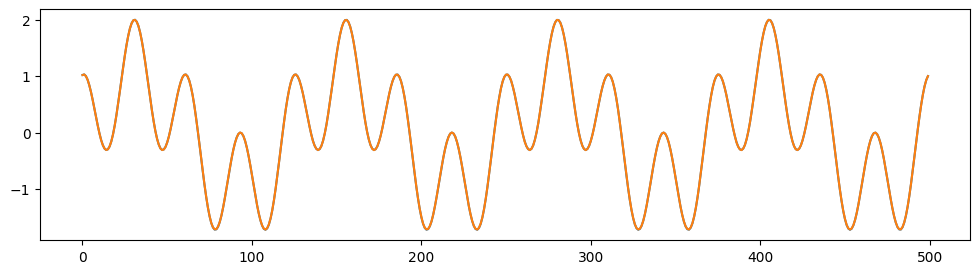

In [13]:
plt.figure(figsize=(12,3))
plt.plot(Ytest[:,0])
plt.plot(yhat)
plt.show()

In [17]:
#autoregressive prediction
yhat = np.zeros((Ns))
x = Xtest[0].copy()
for t in range(Ns):
    yp = net(torch.Tensor(x.reshape((1,1,-1)))).data.numpy()[0,0]
    yp = np.clip(yp,-2,2)
    yhat[t] = yp
    x[0,:-1] = x[0,1:]
    x[0,-1] = yp

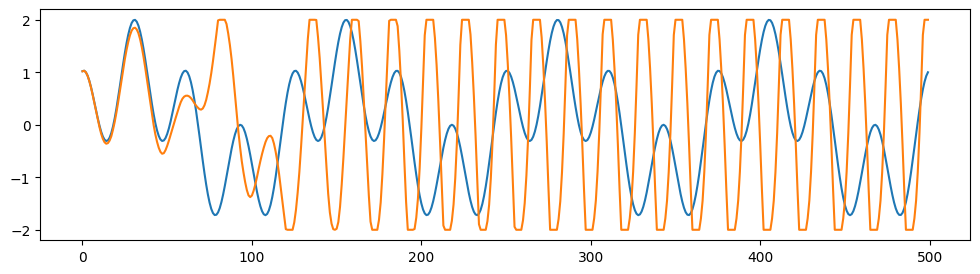

In [18]:
plt.figure(figsize=(12,3))
plt.plot(Ytest)
plt.plot(yhat)
plt.show()

In [16]:
x.shape

(1, 20)